In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [88]:
model_data=pd.read_csv("Quant_Research/data/model_data.csv")

# 1. Feature Engineering

### Age Group Binarization

In [89]:
age_bins = [0, 25, 40, 60, np.inf]
age_labels = ['<25', '25-40', '41-60', '>60']
model_data['Age_bin'] = pd.cut(model_data['Age'], bins=age_bins, labels=age_labels, right=False)
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,Tried Online Grocery,Cheapest prices Rank,Convenience Rank,Catalogue Rank,App Features Rank,Private Label,Expected Standard Delivery,Considered Fast Delivery,Emirate,Age_bin
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,0,1.0,2.0,4.0,3.0,0.636364,28.909434,20.6,Dubai,41-60
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,0,2.0,3.0,1.0,4.0,0.636364,28.909434,20.6,Dubai,41-60
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,0,2.0,1.0,3.0,4.0,0.636364,28.909434,20.6,Dubai,>60
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,1,3.0,1.0,2.0,4.0,0.636364,28.909434,20.6,Sharjah,25-40
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,0,1.0,2.0,4.0,3.0,0.636364,28.909434,20.6,Dubai,<25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,0,1.0,2.0,3.0,4.0,1.000000,15.000000,15.0,Dubai,25-40
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,0,3.0,1.0,2.0,4.0,0.000000,15.000000,15.0,Dubai,41-60
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,1,2.0,1.0,4.0,3.0,1.000000,10.000000,5.0,Dubai,25-40
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,1,1.0,2.0,4.0,3.0,1.000000,20.000000,5.0,Dubai,<25


### Salary Group Categorization

In [90]:
# Create Salary Categories by binning Salary
salary_bins = [0, 3000, 6000, 12000, 100000,np.inf]
salary_labels = ['Low', 'Medium-Low', 'Medium-High', 'High','Very High']
model_data['Salary_bin'] = pd.cut(model_data['Salary'], bins=salary_bins, labels=salary_labels, right=False)
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,Cheapest prices Rank,Convenience Rank,Catalogue Rank,App Features Rank,Private Label,Expected Standard Delivery,Considered Fast Delivery,Emirate,Age_bin,Salary_bin
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,1.0,2.0,4.0,3.0,0.636364,28.909434,20.6,Dubai,41-60,Medium-Low
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,2.0,3.0,1.0,4.0,0.636364,28.909434,20.6,Dubai,41-60,Medium-High
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,2.0,1.0,3.0,4.0,0.636364,28.909434,20.6,Dubai,>60,Medium-Low
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,3.0,1.0,2.0,4.0,0.636364,28.909434,20.6,Sharjah,25-40,Medium-Low
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,1.0,2.0,4.0,3.0,0.636364,28.909434,20.6,Dubai,<25,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,1.0,2.0,3.0,4.0,1.000000,15.000000,15.0,Dubai,25-40,Medium-High
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,3.0,1.0,2.0,4.0,0.000000,15.000000,15.0,Dubai,41-60,Medium-Low
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,2.0,1.0,4.0,3.0,1.000000,10.000000,5.0,Dubai,25-40,Low
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,1.0,2.0,4.0,3.0,1.000000,20.000000,5.0,Dubai,<25,Low


In [91]:
#Compute Spending-to-Income Ratio: Average Weekly Spending divided by Salary
model_data['Spending_to_income'] = (model_data['Average Weekly Spending']*4) / model_data['Salary'] *100
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,Convenience Rank,Catalogue Rank,App Features Rank,Private Label,Expected Standard Delivery,Considered Fast Delivery,Emirate,Age_bin,Salary_bin,Spending_to_income
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,2.0,4.0,3.0,0.636364,28.909434,20.6,Dubai,41-60,Medium-Low,13.052039
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,3.0,1.0,4.0,0.636364,28.909434,20.6,Dubai,41-60,Medium-High,8.390597
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,1.0,3.0,4.0,0.636364,28.909434,20.6,Dubai,>60,Medium-Low,11.746835
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,1.0,2.0,4.0,0.636364,28.909434,20.6,Sharjah,25-40,Medium-Low,23.529412
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,2.0,4.0,3.0,0.636364,28.909434,20.6,Dubai,<25,Low,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,2.0,3.0,4.0,1.000000,15.000000,15.0,Dubai,25-40,Medium-High,5.263158
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,1.0,2.0,4.0,0.000000,15.000000,15.0,Dubai,41-60,Medium-Low,6.666667
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,1.0,4.0,3.0,1.000000,10.000000,5.0,Dubai,25-40,Low,4.166667
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,2.0,4.0,3.0,1.000000,20.000000,5.0,Dubai,<25,Low,23.108597


In [92]:
app_excitement_median = model_data['App_Excitement'].median()
model_data['high_app_excitement'] = (model_data['App_Excitement'] > app_excitement_median).astype(int)
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,Catalogue Rank,App Features Rank,Private Label,Expected Standard Delivery,Considered Fast Delivery,Emirate,Age_bin,Salary_bin,Spending_to_income,high_app_excitement
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,4.0,3.0,0.636364,28.909434,20.6,Dubai,41-60,Medium-Low,13.052039,1
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,1.0,4.0,0.636364,28.909434,20.6,Dubai,41-60,Medium-High,8.390597,0
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,3.0,4.0,0.636364,28.909434,20.6,Dubai,>60,Medium-Low,11.746835,0
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,2.0,4.0,0.636364,28.909434,20.6,Sharjah,25-40,Medium-Low,23.529412,1
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,4.0,3.0,0.636364,28.909434,20.6,Dubai,<25,Low,33.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,3.0,4.0,1.000000,15.000000,15.0,Dubai,25-40,Medium-High,5.263158,0
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,2.0,4.0,0.000000,15.000000,15.0,Dubai,41-60,Medium-Low,6.666667,0
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,4.0,3.0,1.000000,10.000000,5.0,Dubai,25-40,Low,4.166667,0
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,4.0,3.0,1.000000,20.000000,5.0,Dubai,<25,Low,23.108597,0


In [93]:
#One-hot encode 'Customer Segment'
# This creates dummy variables for each unique customer segment (e.g., "Family Living Together").
customer_segment_dummies = pd.get_dummies(model_data['Customer Segment'], prefix='customer_segment')
model_data = pd.concat([model_data, customer_segment_dummies], axis=1)
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,Expected Standard Delivery,Considered Fast Delivery,Emirate,Age_bin,Salary_bin,Spending_to_income,high_app_excitement,customer_segment_Bachelor living alone,customer_segment_Bachelor living with others,customer_segment_Family Living Together
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,28.909434,20.6,Dubai,41-60,Medium-Low,13.052039,1,False,False,True
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,28.909434,20.6,Dubai,41-60,Medium-High,8.390597,0,False,False,True
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,28.909434,20.6,Dubai,>60,Medium-Low,11.746835,0,False,False,True
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,28.909434,20.6,Sharjah,25-40,Medium-Low,23.529412,1,False,False,True
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,28.909434,20.6,Dubai,<25,Low,33.333333,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,15.000000,15.0,Dubai,25-40,Medium-High,5.263158,0,True,False,False
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,15.000000,15.0,Dubai,41-60,Medium-Low,6.666667,0,False,False,True
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,10.000000,5.0,Dubai,25-40,Low,4.166667,0,False,True,False
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,20.000000,5.0,Dubai,<25,Low,23.108597,0,False,False,True


### Delivery Speed Gaps

In [94]:
# Calculate the difference between Expected Standard Delivery and Considered Fast Delivery.
# A larger gap may indicate a higher sensitivity to faster delivery.
model_data['delivery_speed_gap'] = model_data['Expected Standard Delivery'] - model_data['Considered Fast Delivery']
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,Considered Fast Delivery,Emirate,Age_bin,Salary_bin,Spending_to_income,high_app_excitement,customer_segment_Bachelor living alone,customer_segment_Bachelor living with others,customer_segment_Family Living Together,delivery_speed_gap
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,20.6,Dubai,41-60,Medium-Low,13.052039,1,False,False,True,8.309434
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,20.6,Dubai,41-60,Medium-High,8.390597,0,False,False,True,8.309434
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,20.6,Dubai,>60,Medium-Low,11.746835,0,False,False,True,8.309434
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,20.6,Sharjah,25-40,Medium-Low,23.529412,1,False,False,True,8.309434
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,20.6,Dubai,<25,Low,33.333333,1,False,False,True,8.309434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,15.0,Dubai,25-40,Medium-High,5.263158,0,True,False,False,0.000000
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,15.0,Dubai,41-60,Medium-Low,6.666667,0,False,False,True,0.000000
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,5.0,Dubai,25-40,Low,4.166667,0,False,True,False,5.000000
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,5.0,Dubai,<25,Low,23.108597,0,False,False,True,15.000000


### Nationality

In [95]:
#One-hot encode Nationality to capture cultural or market-specific behaviors.
nationality_dummies = pd.get_dummies(model_data['Nationality'], prefix='nationality')
model_data = pd.concat([model_data, nationality_dummies], axis=1)
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,nationality_Jordan,nationality_Lebanon,nationality_Nepal,nationality_Pakistan,nationality_Palestine,nationality_Philippines,nationality_Sri Lanka,nationality_Sudan,nationality_Syria,nationality_United Arab Emirates
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


# Area-Based Spending

In [96]:
#Compute area-based aggregates from the standardized "Address".
#    - 'area_avg_weekly_spending': Average Weekly Spending for each area.
#    - 'area_online_grocery_conversion_rate': Proportion of users in the area who have tried online grocery (using the binary flag).
area_aggregates = model_data.groupby('Address').agg({
    'Average Weekly Spending': 'mean',
    'Tried Online Grocery': 'mean'
}).reset_index()

# Rename the aggregated columns for clarity.
area_aggregates.rename(columns={
    'Average Weekly Spending': 'area_avg_weekly_spending',
    'Tried Online Grocery': 'area_online_grocery_conversion_rate'
}, inplace=True)

# 3. Merge the area-level aggregates back into the main DataFrame.
model_data = pd.merge(model_data, area_aggregates, on='Address', how='left')
model_data

,Unnamed: 0,Gender,Nationality,Age,Salary,unique_id,Address,Supermarket,Online Grocery User,Convenience Shops,...,nationality_Nepal,nationality_Pakistan,nationality_Palestine,nationality_Philippines,nationality_Sri Lanka,nationality_Sudan,nationality_Syria,nationality_United Arab Emirates,area_avg_weekly_spending,area_online_grocery_conversion_rate
0,0,F,Iran,49,4500.00,0,MHBH,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,173.417722,0.500000
1,1,M,Iran,48,7000.00,1,Al Mamzar,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,146.835443,0.000000
2,2,M,Philippines,68,5000.00,2,DIP 1,1.0,0.0,0.0,...,False,False,False,True,False,False,False,False,102.068550,0.417808
3,3,F,India,29,3400.00,3,Sharjah,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,146.250000,0.350000
4,4,M,India,22,1500.00,4,DIP 1,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,102.068550,0.417808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,368,M,India,33,9500.00,368,DIP 1,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,102.068550,0.417808
344,369,M,India,42,4500.00,369,DIP 1,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,102.068550,0.417808
345,370,F,India,25,2400.00,370,Dubai,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,99.749148,0.565891
346,371,M,India,24,1500.00,371,Dubai,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,99.749148,0.565891


## Customer Segment Analysis

segment families and bachelors

In [97]:
bachelor_values = ["Bachelor living with others", "Bachelor living alone"]
bachelors = model_data[model_data["Customer Segment"].isin(bachelor_values)]
    
    
family_values = ["Family Living Together"]
families = model_data[model_data["Customer Segment"].isin(family_values)]

In [98]:
families.describe()

,Unnamed: 0,Age,Salary,unique_id,Supermarket,Online Grocery User,Convenience Shops,App_Excitement,Average Weekly Spending,Free Delivery Gambit,...,Catalogue Rank,App Features Rank,Private Label,Expected Standard Delivery,Considered Fast Delivery,Spending_to_income,high_app_excitement,delivery_speed_gap,area_avg_weekly_spending,area_online_grocery_conversion_rate
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,145.365714,35.057143,5733.609801,145.365714,0.914286,0.268571,0.051429,8.277349,132.936243,0.840000,...,2.902857,3.531429,0.665974,28.163817,19.658286,17.508129,0.348571,8.505531,121.080923,0.467563
std,121.960626,11.957643,9351.964417,121.960626,0.280745,0.444488,0.221504,1.955863,52.998147,0.367658,...,0.807111,0.756494,0.318401,9.885085,6.286130,12.224704,0.477885,8.519108,26.651383,0.175155
min,0.000000,0.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,...,1.000000,1.000000,0.000000,2.000000,2.000000,0.553947,0.000000,-15.000000,75.000000,0.000000
25%,45.500000,28.500000,1875.000000,45.500000,1.000000,0.000000,0.000000,8.247423,75.000000,1.000000,...,2.500000,3.000000,0.636364,28.909434,17.500000,8.276256,0.000000,5.000000,102.068550,0.417808
50%,90.000000,34.000000,4042.248418,90.000000,1.000000,0.000000,0.000000,8.247423,125.000000,1.000000,...,3.000000,4.000000,0.636364,28.909434,20.600000,14.000000,0.000000,8.309434,102.068550,0.417808
75%,263.500000,41.000000,6000.000000,263.500000,1.000000,1.000000,0.000000,10.000000,175.000000,1.000000,...,3.000000,4.000000,1.000000,29.454717,20.600000,23.301134,1.000000,8.309434,146.250000,0.565891
max,374.000000,74.000000,80834.000000,374.000000,1.000000,1.000000,1.000000,10.000000,200.000000,1.000000,...,4.000000,4.000000,1.000000,60.000000,45.000000,61.538462,1.000000,45.000000,200.000000,1.000000


In [99]:
bachelors.describe()

,Unnamed: 0,Age,Salary,unique_id,Supermarket,Online Grocery User,Convenience Shops,App_Excitement,Average Weekly Spending,Free Delivery Gambit,...,Catalogue Rank,App Features Rank,Private Label,Expected Standard Delivery,Considered Fast Delivery,Spending_to_income,high_app_excitement,delivery_speed_gap,area_avg_weekly_spending,area_online_grocery_conversion_rate
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.0,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.0,173.000000,173.000000,173.000000
mean,224.780347,33.936416,2265.417438,224.780347,0.982659,0.150289,0.0,8.199750,89.407130,0.786127,...,2.843931,3.919075,0.627956,29.600633,21.818497,23.859609,0.0,7.782135,101.399507,0.492350
std,73.245035,9.736141,2123.696386,73.245035,0.130918,0.358392,0.0,0.627040,45.375505,0.411228,...,0.462464,0.395226,0.483363,15.839969,15.032187,15.776095,0.0,18.576035,4.999983,0.075392
min,32.000000,0.000000,800.000000,32.000000,0.000000,0.000000,0.0,0.000000,25.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,5.000000,2.000000,0.0,-45.000000,99.749148,0.350000
25%,169.000000,27.000000,900.000000,169.000000,1.000000,0.000000,0.0,8.247423,75.000000,1.000000,...,3.000000,4.000000,0.000000,15.000000,15.000000,10.000000,0.0,0.000000,99.749148,0.417808
50%,224.000000,33.000000,1500.000000,224.000000,1.000000,0.000000,0.0,8.247423,75.000000,1.000000,...,3.000000,4.000000,1.000000,30.000000,20.000000,20.689655,0.0,8.309434,99.749148,0.565891
75%,280.000000,40.000000,3050.000000,280.000000,1.000000,0.000000,0.0,8.247423,125.000000,1.000000,...,3.000000,4.000000,1.000000,40.000000,20.000000,34.285714,0.0,15.000000,102.068550,0.565891
max,370.000000,63.000000,17000.000000,370.000000,1.000000,1.000000,0.0,8.247423,200.000000,1.000000,...,4.000000,4.000000,1.000000,60.000000,60.000000,70.000000,0.0,50.000000,146.250000,0.565891


Distribution of Customer Segment values:
Customer Segment
Family Living Together         175
Bachelor living with others    139
Bachelor living alone           34
Name: count, dtype: int64

Number of bachelor records found: 173
Number of family records found: 175

Summary Statistics by Customer Segment:
            Age          Salary          Average Weekly Spending         \
           mean median     mean   median                    mean median   
Segment                                                                   
Bachelor  33.94   33.0  2265.42  1500.00                   89.41   75.0   
Family    35.06   34.0  5733.61  4042.25                  132.94  125.0   

         Spending_to_income        Online Grocery User Tried Online Grocery  \
                       mean median                mean                 mean   
Segment                                                                       
Bachelor              23.86  20.69                0.15                 0.53   
Fam

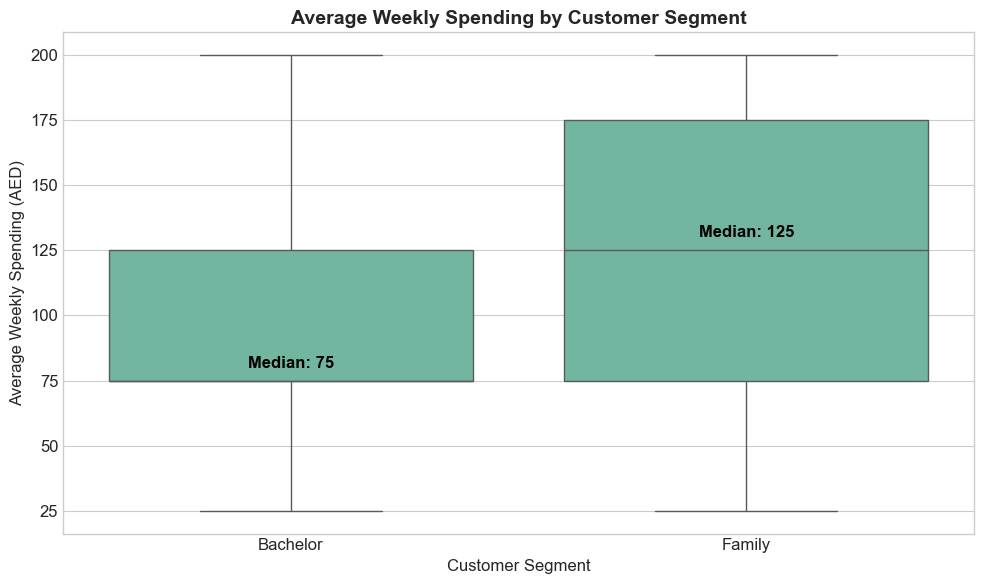

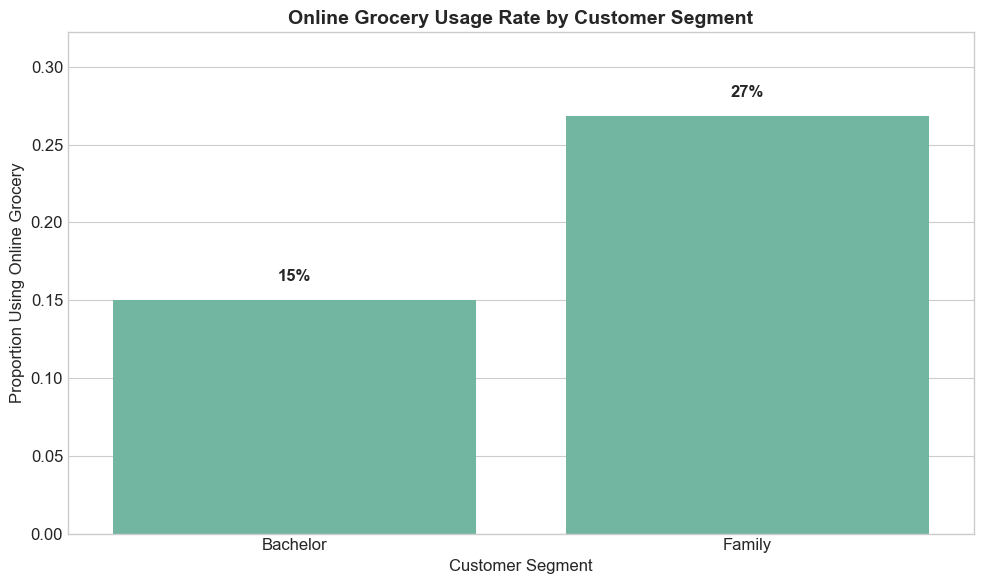

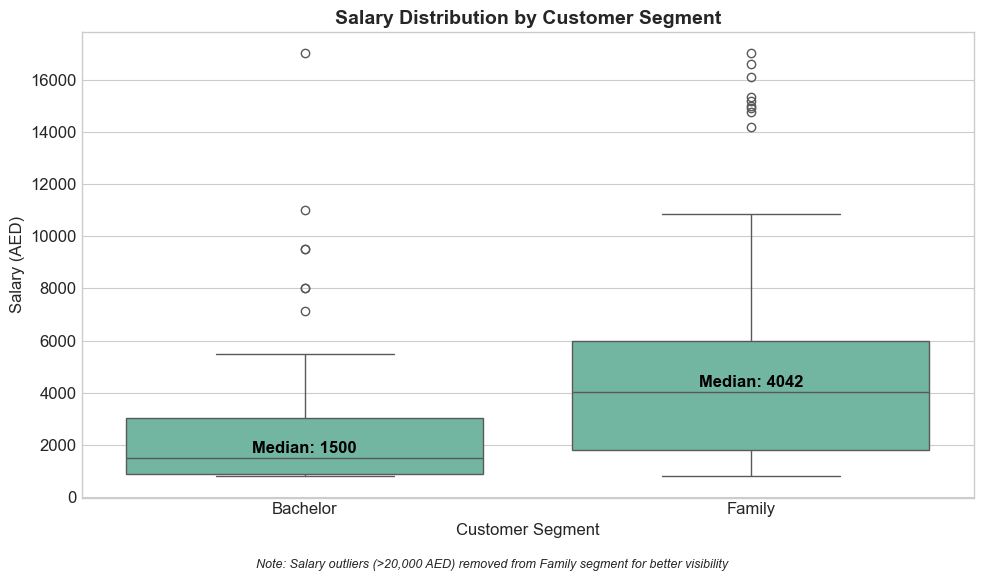

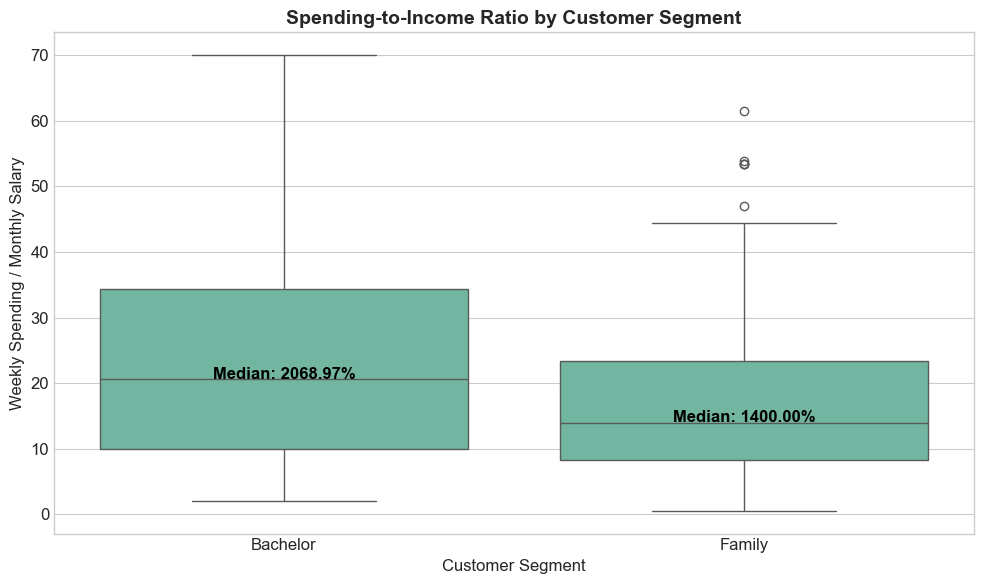

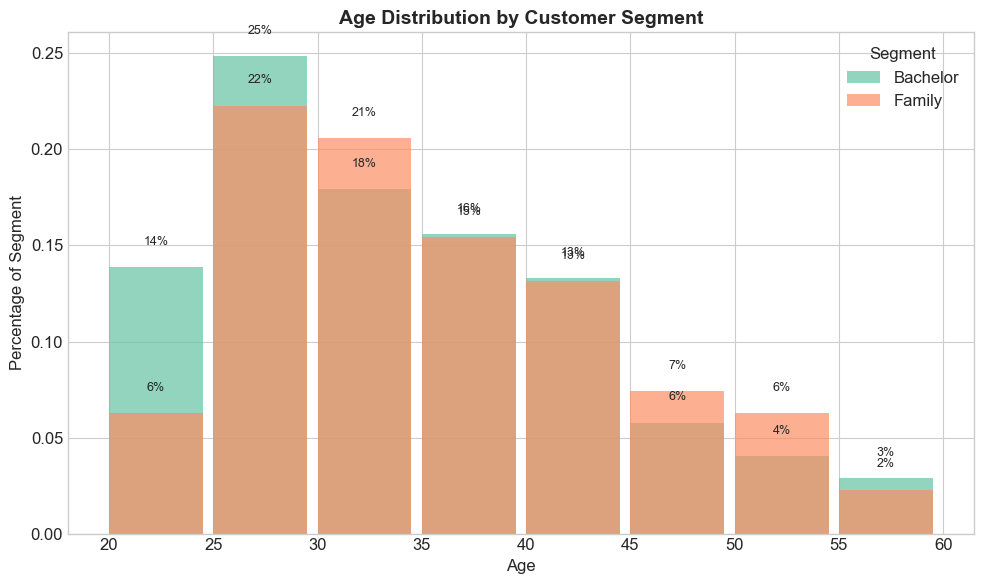

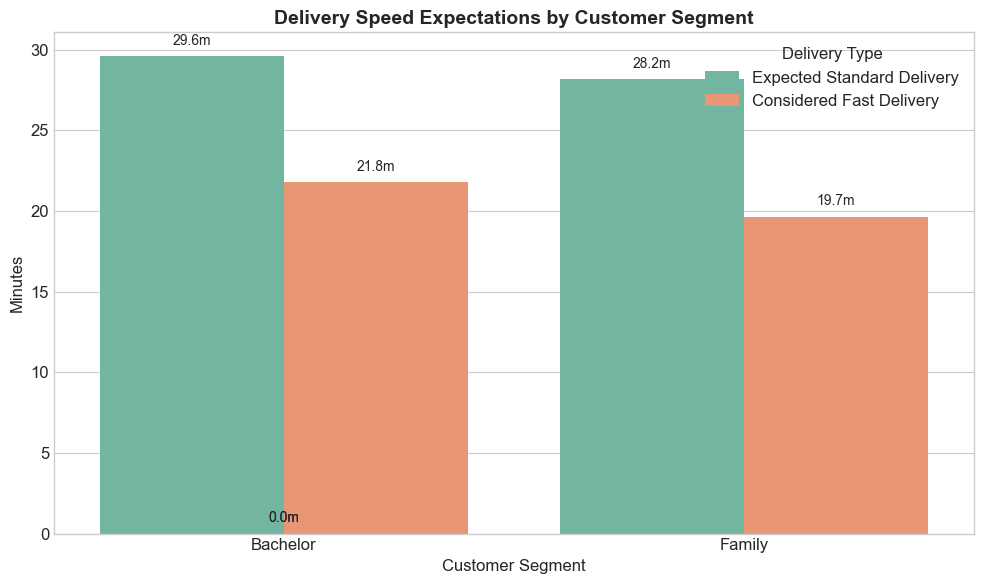

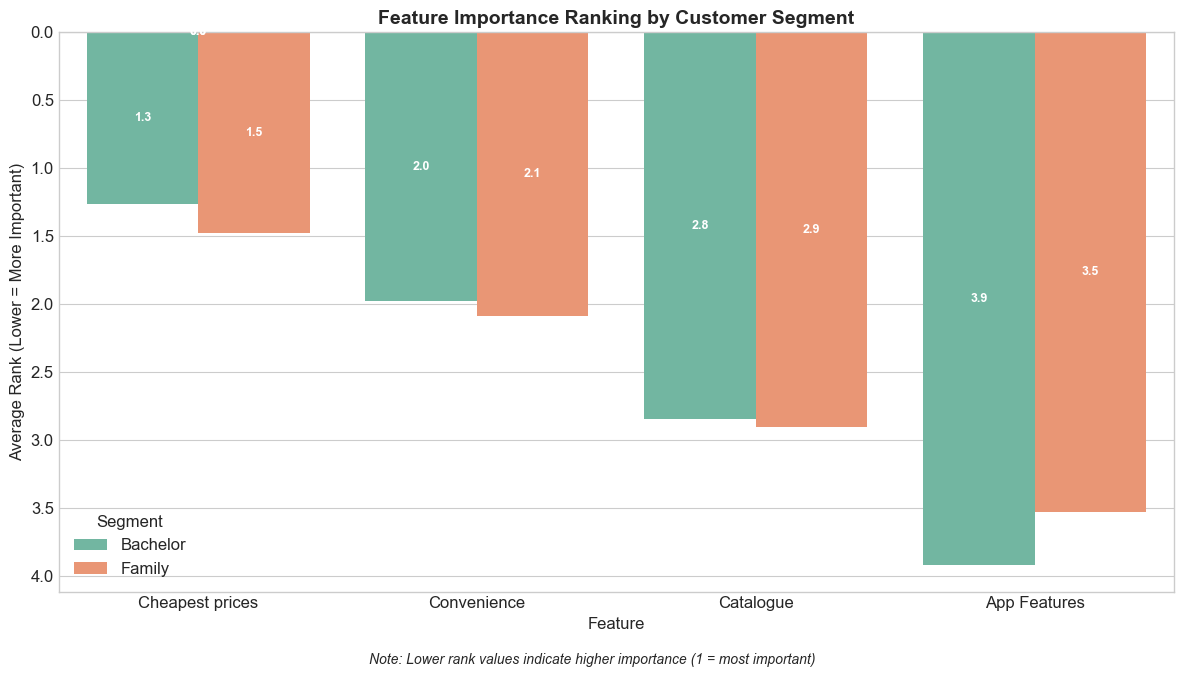

In [100]:
# Create better visualizations for customer segments
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set a consistent style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

def analyze_customer_segments(df):
    """
    Analyzes and visualizes differences between Bachelor and Family customer segments
    with improved aesthetics and number labels.
    """
    # Check if the required column exists
    if 'Customer Segment' not in df.columns:
        print("Customer Segment column not found in the dataframe")
        return
    
    # Print the distribution of Customer Segment values
    print("Distribution of Customer Segment values:")
    print(df['Customer Segment'].value_counts(dropna=False))
    
    # Filter for bachelors and families
    bachelor_values = ["Bachelor living with others", "Bachelor living alone"]
    bachelors = df[df["Customer Segment"].isin(bachelor_values)]
    
    family_values = ["Family Living Together"]
    families = df[df["Customer Segment"].isin(family_values)]
    
    # Print the counts to verify filtering
    print(f"\nNumber of bachelor records found: {len(bachelors)}")
    print(f"Number of family records found: {len(families)}")
    
    # If either segment has no records, return early
    if len(bachelors) == 0 or len(families) == 0:
        print("One or both segments have no records. Check the 'Customer Segment' values.")
        return
    
    # Combine the two into a new DataFrame with an indicator column for the segment
    segments = pd.concat([
        bachelors.assign(Segment='Bachelor'),
        families.assign(Segment='Family')
    ])
    
    # Summary statistics: Compare key metrics between segments
    summary_stats = segments.groupby('Segment').agg({
        'Age': ['mean', 'median'],
        'Salary': ['mean', 'median'],
        'Average Weekly Spending': ['mean', 'median'],
        'Spending_to_income': ['mean', 'median'],
        'Online Grocery User': 'mean',
        'Tried Online Grocery': 'mean',
        'high_app_excitement': 'mean',
    }).round(2)
    
    print("\nSummary Statistics by Customer Segment:")
    print(summary_stats)
    
    # 1. Visualization: Average Weekly Spending by Segment
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Segment', y='Average Weekly Spending', data=segments)
    
    # Add median values as labels
    for i, segment in enumerate(['Bachelor', 'Family']):
        median_val = segments[segments['Segment'] == segment]['Average Weekly Spending'].median()
        plt.text(i, median_val + 5, f'Median: {median_val:.0f}', 
                 horizontalalignment='center', size='medium', color='black', weight='semibold')
    
    plt.title('Average Weekly Spending by Customer Segment', fontsize=14, fontweight='bold')
    plt.ylabel('Average Weekly Spending (AED)', fontsize=12)
    plt.xlabel('Customer Segment', fontsize=12)
    plt.tight_layout()
    plt.savefig('Visualisations/weekly_spending_by_segment.png', dpi=300)
    plt.show()
    
    # 2. Visualization: Online Grocery Usage Rate
    plt.figure(figsize=(10, 6))
    usage_rate = segments.groupby('Segment')['Online Grocery User'].mean().reset_index()
    ax = sns.barplot(x='Segment', y='Online Grocery User', data=usage_rate)
    
    # Add percentage labels on bars
    for i, v in enumerate(usage_rate['Online Grocery User']):
        plt.text(i, v + 0.01, f'{v:.0%}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.title('Online Grocery Usage Rate by Customer Segment', fontsize=14, fontweight='bold')
    plt.ylabel('Proportion Using Online Grocery', fontsize=12)
    plt.xlabel('Customer Segment', fontsize=12)
    plt.ylim(0, max(usage_rate['Online Grocery User']) * 1.2)  # Add space for labels
    plt.tight_layout()
    plt.savefig('Visualisations/online_grocery_usage_by_segment.png', dpi=300)
    plt.show()
    
    # 3. Visualization: Salary Distribution
    plt.figure(figsize=(10, 6))

    # Filter out the outlier from the Family segment
    salary_plot_data = segments.copy()
    # Remove extreme outliers (e.g., salaries > 20000) from the Family segment
    salary_plot_data = salary_plot_data[~((salary_plot_data['Segment'] == 'Family') & 
                                        (salary_plot_data['Salary'] > 20000))]

    # Create the boxplot with the filtered data
    ax = sns.boxplot(x='Segment', y='Salary', data=salary_plot_data)

    # Add median values as labels
    for i, segment in enumerate(['Bachelor', 'Family']):
        median_val = salary_plot_data[salary_plot_data['Segment'] == segment]['Salary'].median()
        plt.text(i, median_val + 200, f'Median: {median_val:.0f}', 
                horizontalalignment='center', size='medium', color='black', weight='semibold')

    plt.title('Salary Distribution by Customer Segment', fontsize=14, fontweight='bold')
    plt.ylabel('Salary (AED)', fontsize=12)
    plt.xlabel('Customer Segment', fontsize=12)

    # Add a note about the outlier removal
    plt.figtext(0.5, 0.01, 'Note: Salary outliers (>20,000 AED) removed from Family segment for better visibility', 
                ha='center', fontsize=9, style='italic')

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for the note
    plt.savefig('Visualisations/salary_by_segment.png', dpi=300)
    plt.show()
    
    # 4. Visualization: Spending-to-Income Ratio
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Segment', y='Spending_to_income', data=segments)
    
    # Add median values as labels
    for i, segment in enumerate(['Bachelor', 'Family']):
        median_val = segments[segments['Segment'] == segment]['Spending_to_income'].median()
        plt.text(i, median_val + 0.005, f'Median: {median_val:.2%}', 
                 horizontalalignment='center', size='medium', color='black', weight='semibold')
    
    plt.title('Spending-to-Income Ratio by Customer Segment', fontsize=14, fontweight='bold')
    plt.ylabel('Weekly Spending / Monthly Salary', fontsize=12)
    plt.xlabel('Customer Segment', fontsize=12)
    plt.tight_layout()
    plt.savefig("visualisations/spending_ratio_by_segment.png", dpi=300)
    plt.show()
    
    # 5. Visualization: Age Distribution
    plt.figure(figsize=(10, 6))
    
    # Create age bins for better visualization
    age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60]
    
    # Plot histograms with proper normalization
    for segment, color in zip(['Bachelor', 'Family'], sns.color_palette("Set2")[:2]):
        segment_data = segments[segments['Segment'] == segment]['Age']
        counts, bins = np.histogram(segment_data, bins=age_bins)
        counts = counts / len(segment_data)  # Normalize to percentages
        plt.bar(bins[:-1], counts, width=4.5, alpha=0.7, color=color, 
                label=segment, align='edge')
        
        # Add percentage labels
        for i, (count, bin_val) in enumerate(zip(counts, bins[:-1])):
            if count > 0.02:  # Only show labels for bars with significant height
                plt.text(bin_val + 2.25, count + 0.01, f'{count:.0%}', 
                         ha='center', va='bottom', fontsize=9)
    
    plt.title('Age Distribution by Customer Segment', fontsize=14, fontweight='bold')
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Percentage of Segment', fontsize=12)
    plt.legend(title='Segment')
    plt.tight_layout()
    plt.savefig('Visualisations/age_distribution_by_segment.png', dpi=300)
    plt.show()
    
    # 6. Visualization: Delivery Speed Expectations
    plt.figure(figsize=(10, 6))
    
    # Calculate average values for each segment
    delivery_data = segments.groupby('Segment')[['Expected Standard Delivery', 'Considered Fast Delivery']].mean().reset_index()
    
    # Reshape for seaborn
    delivery_melted = pd.melt(delivery_data, id_vars=['Segment'], 
                             value_vars=['Expected Standard Delivery', 'Considered Fast Delivery'],
                             var_name='Delivery Type', value_name='Minutes')
    
    # Create the grouped bar chart
    ax = sns.barplot(x='Segment', y='Minutes', hue='Delivery Type', data=delivery_melted)
    
    # Add value labels on bars
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.1f}m', 
                ha='center', va='bottom', fontsize=10)
    
    plt.title('Delivery Speed Expectations by Customer Segment', fontsize=14, fontweight='bold')
    plt.ylabel('Minutes', fontsize=12)
    plt.xlabel('Customer Segment', fontsize=12)
    plt.legend(title='Delivery Type')
    plt.tight_layout()
    plt.savefig('Visualisations/delivery_expectations_by_segment.png', dpi=300)
    plt.show()
    
        # 7. Visualization: Feature Ranking Comparison (Corrected)
    plt.figure(figsize=(12, 7))

    # Calculate average rank values for each segment
    rank_cols = ['Cheapest prices Rank', 'Convenience Rank', 'Catalogue Rank', 'App Features Rank']
    rank_data = segments.groupby('Segment')[rank_cols].mean().reset_index()

    # Reshape for seaborn
    rank_melted = pd.melt(rank_data, id_vars=['Segment'], 
                        value_vars=rank_cols,
                        var_name='Feature', value_name='Average Rank')

    # Clean up feature names for display
    rank_melted['Feature'] = rank_melted['Feature'].str.replace(' Rank', '')

    # Create the grouped bar chart with INVERTED y-axis to show importance correctly
    ax = sns.barplot(x='Feature', y='Average Rank', hue='Segment', data=rank_melted)

    # Invert the y-axis so lower ranks (higher importance) appear higher on the chart
    plt.gca().invert_yaxis()

    # Add value labels on bars
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        # Calculate the y position for the text
        y_pos = p.get_y() + height/2
        # Add the rank value as text
        ax.text(p.get_x() + p.get_width()/2., y_pos, f'{p.get_height():.1f}', 
                ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    plt.title('Feature Importance Ranking by Customer Segment', fontsize=14, fontweight='bold')
    plt.ylabel('Average Rank (Lower = More Important)', fontsize=12)
    plt.xlabel('Feature', fontsize=12)
    plt.legend(title='Segment')

    # Add a note explaining the ranking scale
    plt.figtext(0.5, 0.01, 'Note: Lower rank values indicate higher importance (1 = most important)', 
                ha='center', fontsize=10, style='italic')

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for the note
    plt.savefig('Visualisations/feature_ranking_by_segment.png', dpi=300)
    plt.show()

# Run the improved analysis with better visualizations
analyze_customer_segments(model_data)

Generating correlation matrix with customer segment...


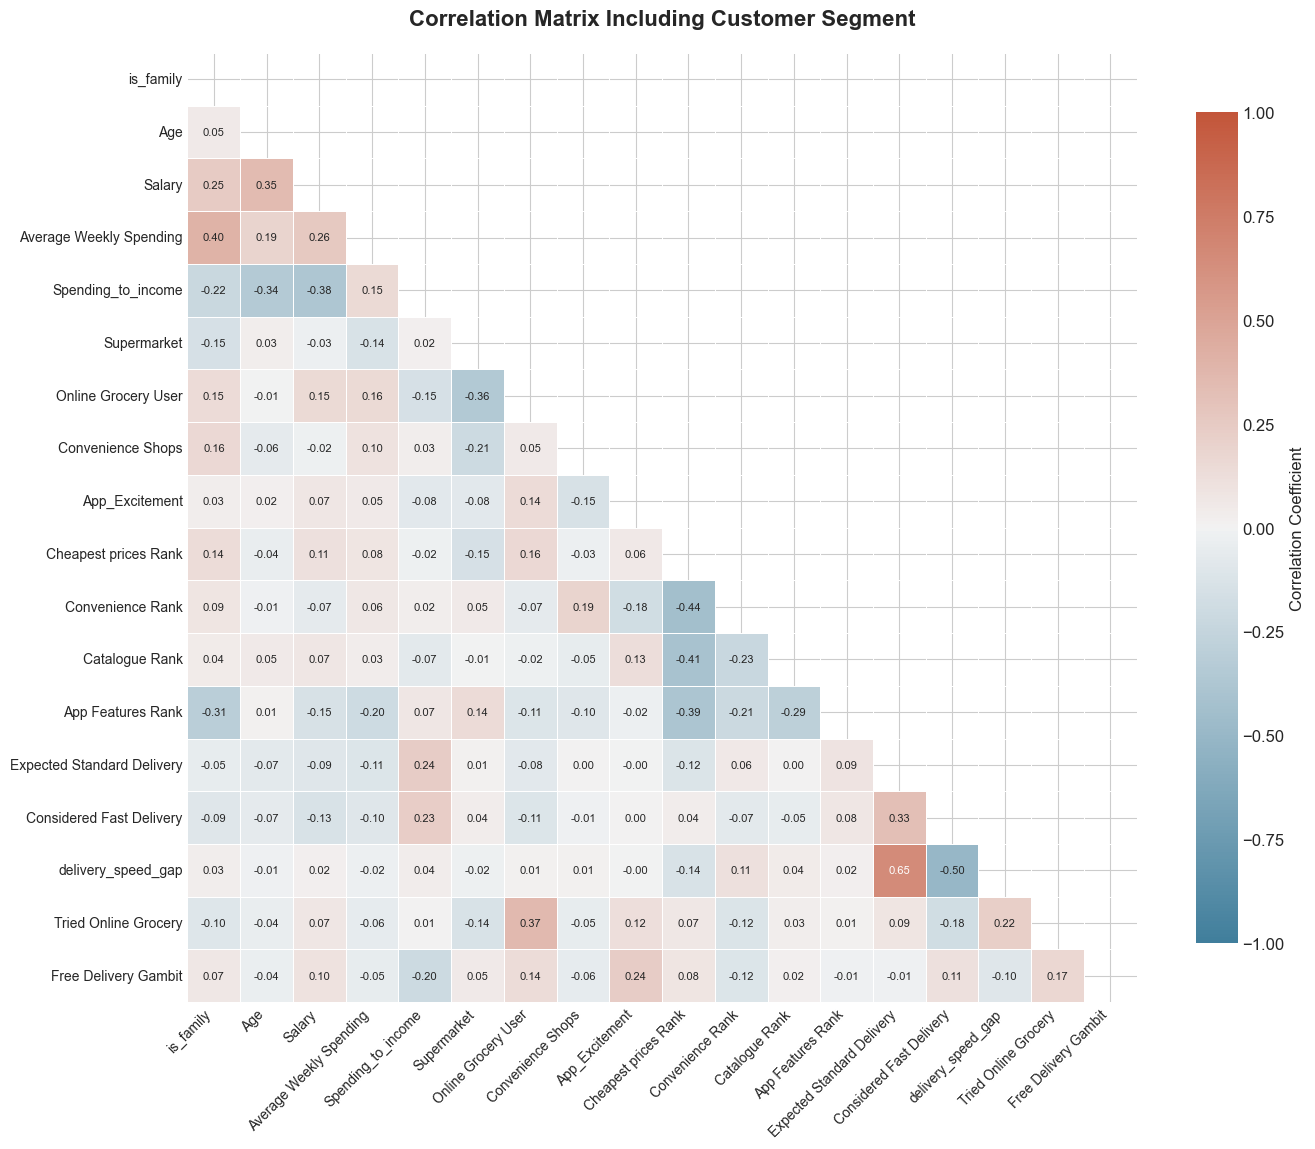


Generating correlations with customer segment...


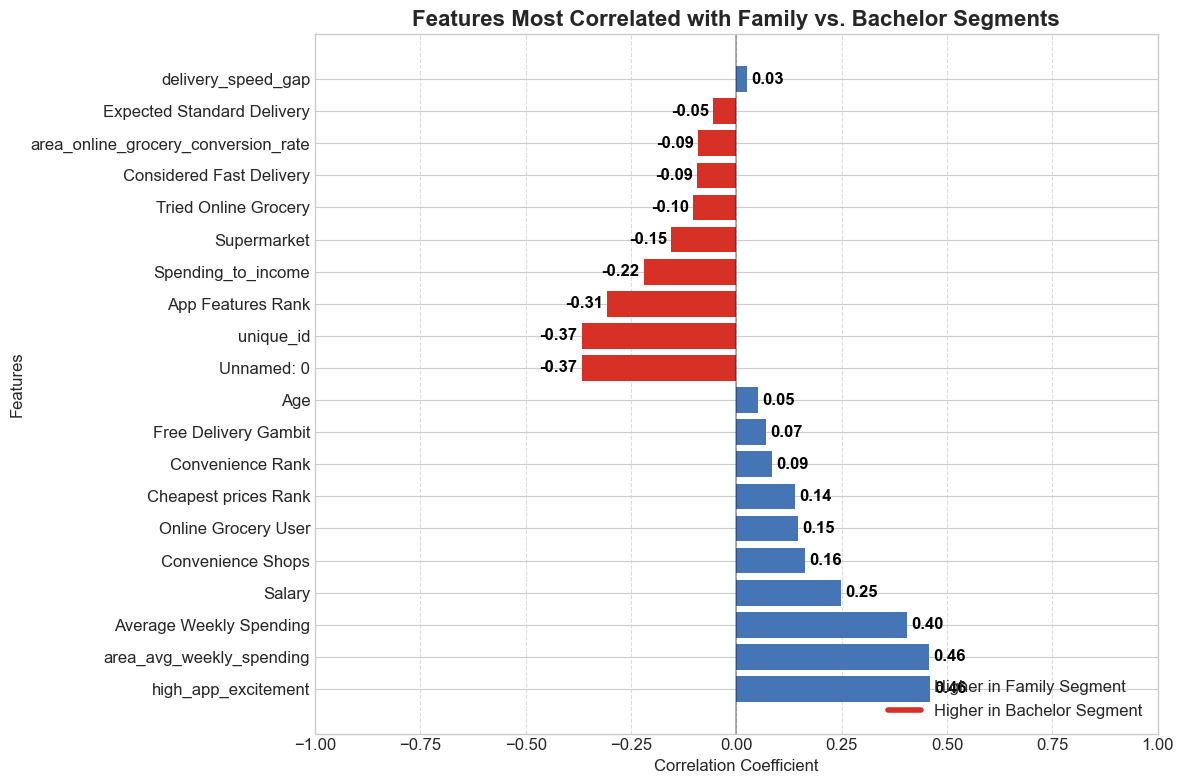


Generating key correlations with Free Delivery Gambit...
Error creating key correlations plot: name 'create_key_correlations_plot' is not defined


In [101]:
def create_correlation_matrix(df, title="Correlation Matrix", figsize=(14, 12)):
    """
    Creates and visualizes a correlation matrix with improved aesthetics,
    including customer segment as a feature.
    
    Args:
        df: DataFrame containing the variables to correlate
        title: Title for the plot
        figsize: Size of the figure as a tuple (width, height)
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Add a binary indicator for customer segment (1 for Family, 0 for Bachelor)
    if 'Customer Segment' in df_copy.columns:
        df_copy['is_family'] = df_copy['Customer Segment'].apply(
            lambda x: 1 if x == 'Family Living Together' else 0
        )
    
    # Select only numeric columns for correlation
    numeric_df = df_copy.select_dtypes(include=['int64', 'float64'])
    
    # Remove columns with all identical values (correlation undefined)
    numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]
    
    # Select the most relevant features for a cleaner visualization
    relevant_features = [
        'is_family',  # Our new customer segment indicator
        'Age', 'Gender', 'Salary', 'Average Weekly Spending', 'Spending_to_income',
        'Supermarket', 'Online Grocery User', 'Convenience Shops',
        'App_Excitement', 'Cheapest prices Rank', 'Convenience Rank', 
        'Catalogue Rank', 'App Features Rank', 'Expected Standard Delivery',
        'Considered Fast Delivery', 'delivery_speed_gap',
        'Tried Online Grocery', 'Free Delivery Gambit'  # Include target variable
    ]
    
    # Filter to only include columns that exist in the dataframe
    relevant_features = [col for col in relevant_features if col in numeric_df.columns]
    
    # Compute the correlation matrix
    corr_matrix = numeric_df[relevant_features].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=figsize)
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Draw the heatmap
    sns.heatmap(
        corr_matrix, 
        mask=mask,
        cmap=cmap,
        vmax=1.0, vmin=-1.0,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
        annot=True,  # Add correlation values
        fmt=".2f",   # Format as 2 decimal places
        annot_kws={"size": 8}  # Adjust annotation size
    )
    
    # Customize the plot
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('Visualisations/correlation_matrix_with_segment.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    # Return the correlation matrix for further analysis
    return corr_matrix

# Create a second visualization focusing on key relationships with customer segment
def create_segment_correlations_plot(df, figsize=(12, 8)):
    """
    Creates a horizontal bar chart showing correlations of key variables with customer segment.
    
    Args:
        df: DataFrame containing the variables
        figsize: Size of the figure as a tuple (width, height)
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Add a binary indicator for customer segment (1 for Family, 0 for Bachelor)
    if 'Customer Segment' in df_copy.columns:
        df_copy['is_family'] = df_copy['Customer Segment'].apply(
            lambda x: 1 if x == 'Family Living Together' else 0
        )
    else:
        print("Customer Segment column not found in the dataframe")
        return
    
    # Select only numeric columns for correlation
    numeric_df = df_copy.select_dtypes(include=['int64', 'float64'])
    
    # Compute correlations with the customer segment indicator
    correlations = numeric_df.corr()['is_family'].sort_values(ascending=False)
    
    # Drop the self-correlation
    correlations = correlations.drop('is_family')
    
    # Select top and bottom correlations (strongest positive and negative)
    top_n = 10
    top_positive = correlations.head(top_n)
    top_negative = correlations.tail(top_n).iloc[::-1]  # Reverse to show most negative first
    
    # Combine them for visualization
    top_correlations = pd.concat([top_positive, top_negative])
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Create a colormap based on correlation values
    colors = ['#d73027' if x < 0 else '#4575b4' for x in top_correlations]
    
    # Create the horizontal bar chart
    bars = plt.barh(top_correlations.index, top_correlations, color=colors)
    
    # Add correlation values as text
    for i, (value, name) in enumerate(zip(top_correlations, top_correlations.index)):
        plt.text(
            value + (0.01 if value >= 0 else -0.01),
            i,
            f'{value:.2f}',
            va='center',
            ha='left' if value >= 0 else 'right',
            fontweight='bold',
            color='black'
        )
    
    # Add a vertical line at x=0
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Customize the plot
    plt.title('Features Most Correlated with Family vs. Bachelor Segments', fontsize=16, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.xlim(-1, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add a legend explaining the colors and interpretation
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='#4575b4', lw=4, label='Higher in Family Segment'),
        Line2D([0], [0], color='#d73027', lw=4, label='Higher in Bachelor Segment')
    ]
    plt.legend(handles=legend_elements, loc='lower right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('Visualisations/segment_correlations.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    return top_correlations

# Execute both visualizations
print("Generating correlation matrix with customer segment...")
corr_matrix = create_correlation_matrix(model_data, title="Correlation Matrix Including Customer Segment")

print("\nGenerating correlations with customer segment...")
segment_correlations = create_segment_correlations_plot(model_data)

# Also create the original target variable correlation plot
print("\nGenerating key correlations with Free Delivery Gambit...")
try:
    key_correlations = create_key_correlations_plot(model_data, target_var='Free Delivery Gambit')
except Exception as e:
    print(f"Error creating key correlations plot: {e}")
    # Try with alternative column name if available
    if 'Free_Delivery_Gambit' in model_data.columns:
        print("Trying with alternative column name 'Free_Delivery_Gambit'...")
        key_correlations = create_key_correlations_plot(model_data, target_var='Free_Delivery_Gambit')


1.5 Feature Correlation Analysis with Target Variable
Categorical features: ['Gender', 'Nationality', 'Address', 'Customer Segment', 'Emirate', 'Age_bin', 'Salary_bin']

Available columns in model_data:
['Unnamed: 0', 'Gender', 'Nationality', 'Age', 'Salary', 'unique_id', 'Address', 'Supermarket', 'Online Grocery User', 'Convenience Shops', 'App_Excitement', 'Average Weekly Spending', 'Free Delivery Gambit', 'Customer Segment', 'Tried Online Grocery', 'Cheapest prices Rank', 'Convenience Rank', 'Catalogue Rank', 'App Features Rank', 'Private Label', 'Expected Standard Delivery', 'Considered Fast Delivery', 'Emirate', 'Age_bin', 'Salary_bin', 'Spending_to_income', 'high_app_excitement', 'customer_segment_Bachelor living alone', 'customer_segment_Bachelor living with others', 'customer_segment_Family Living Together', 'delivery_speed_gap', 'nationality_Bangladesh', 'nationality_Egypt', 'nationality_India', 'nationality_Iran', 'nationality_Jordan', 'nationality_Lebanon', 'nationality_Nep

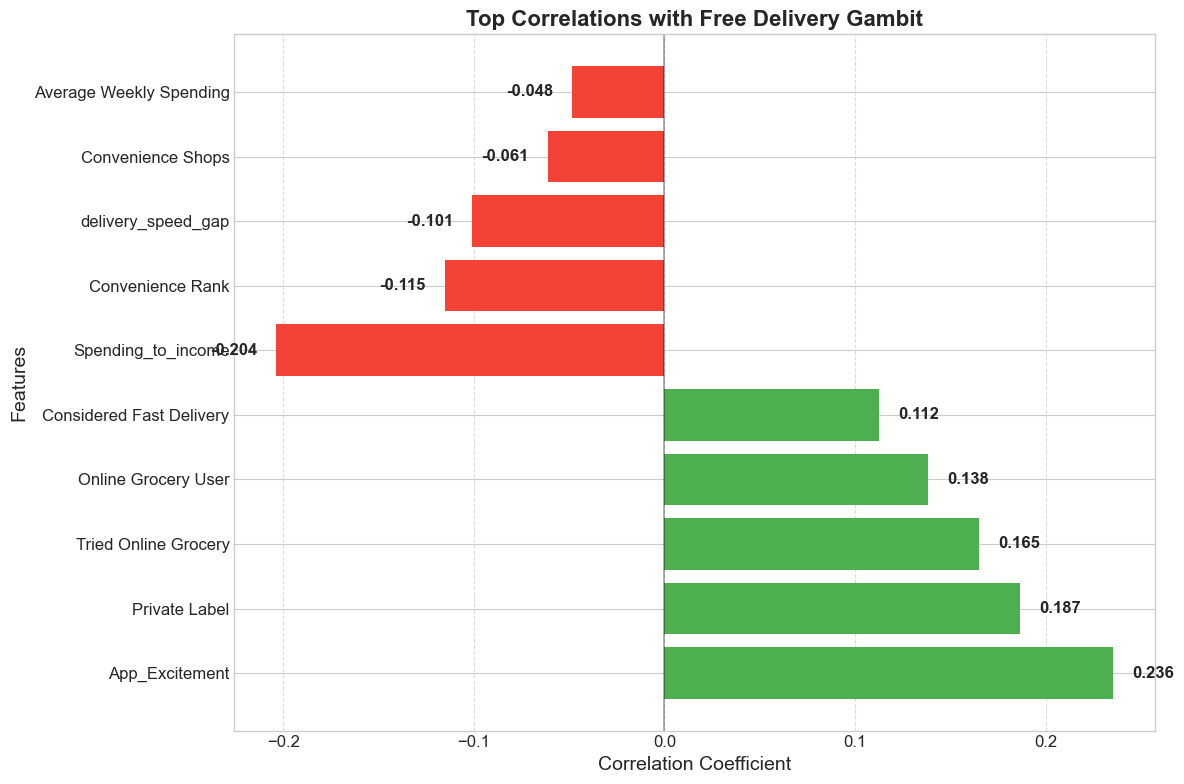

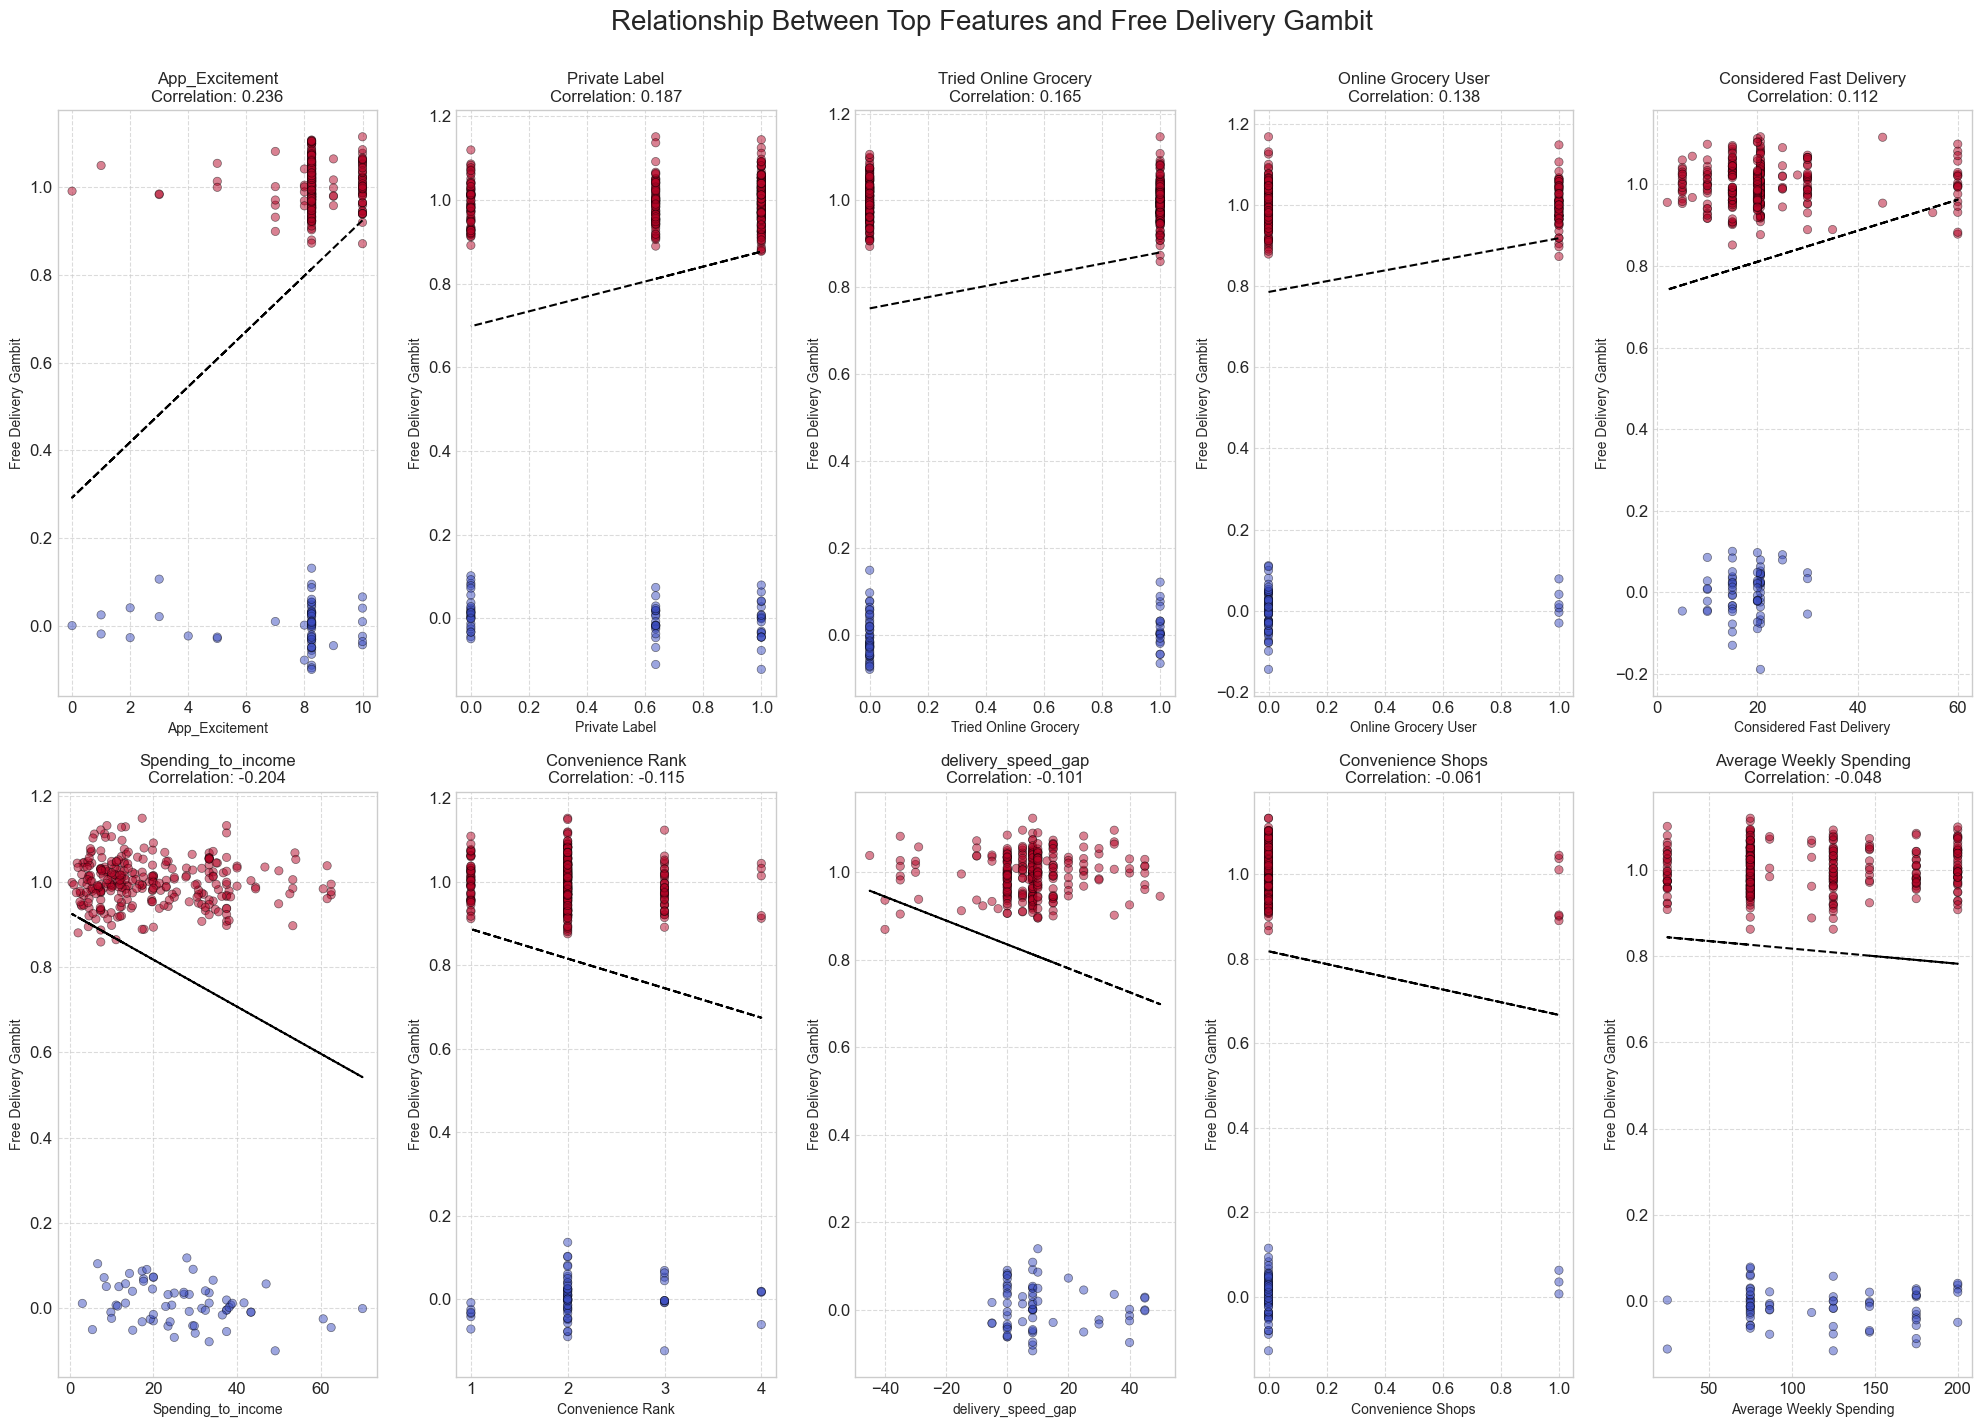

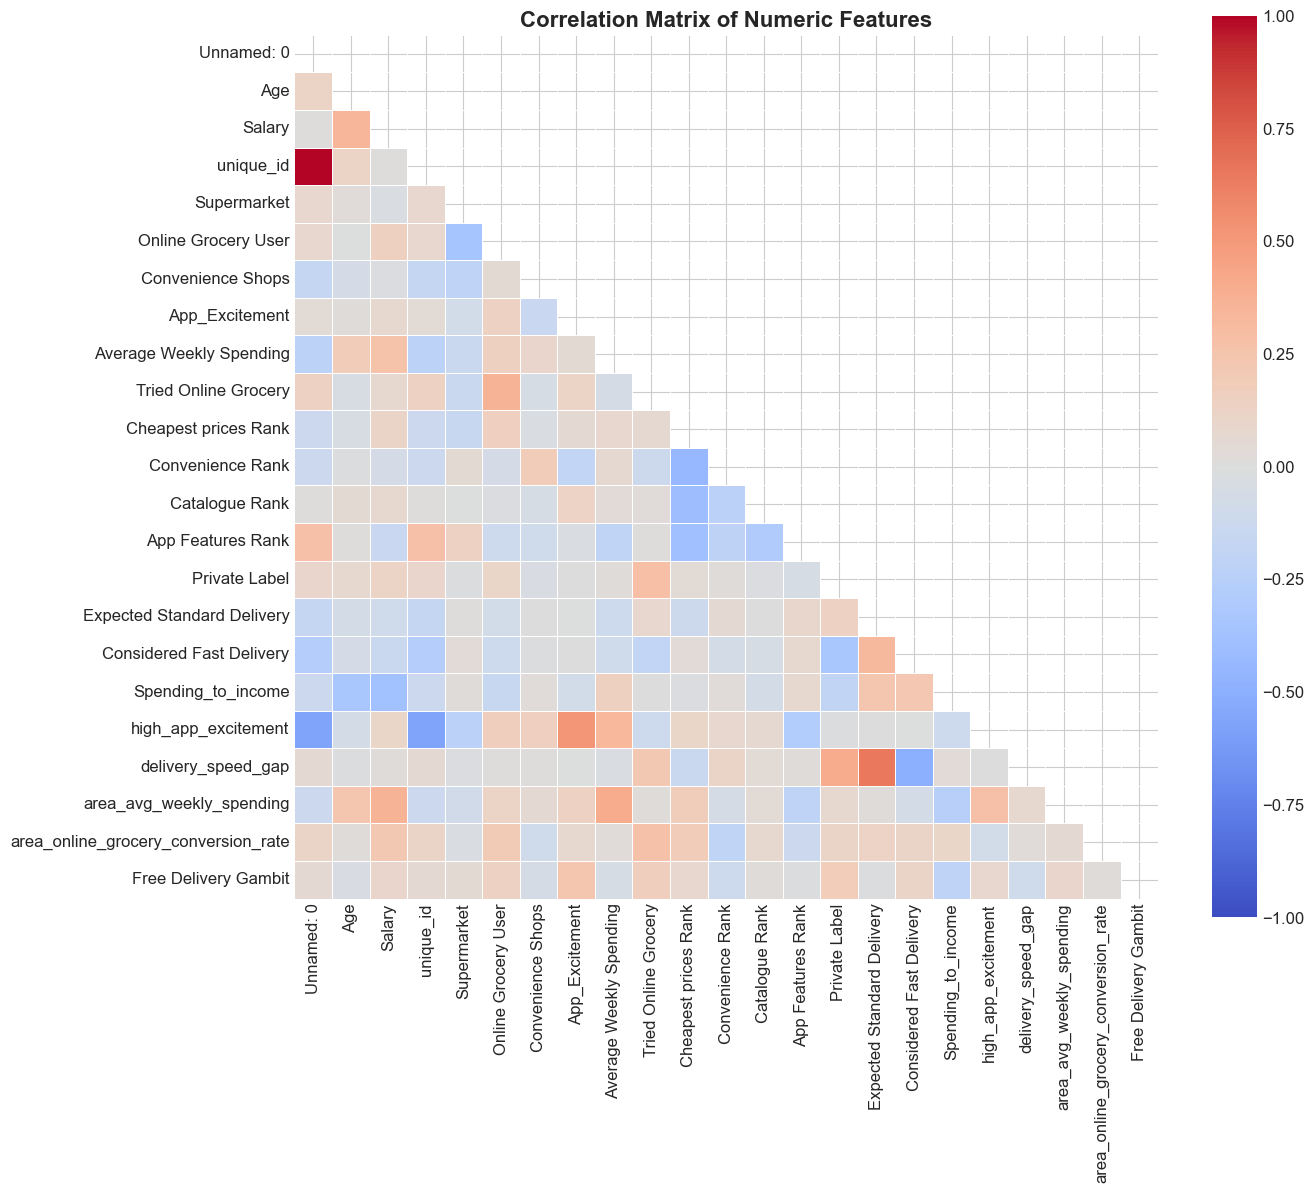

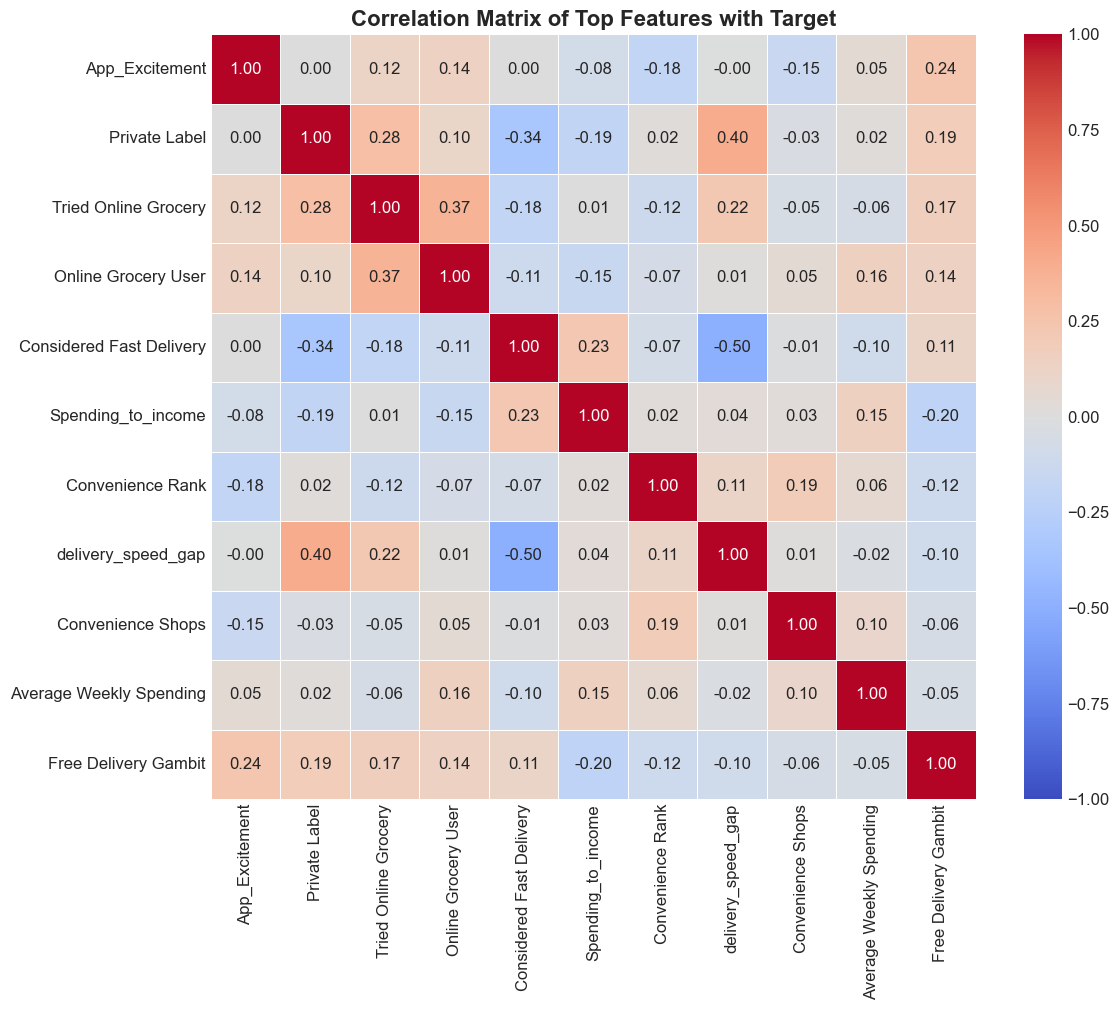

<Figure size 1500x1500 with 0 Axes>

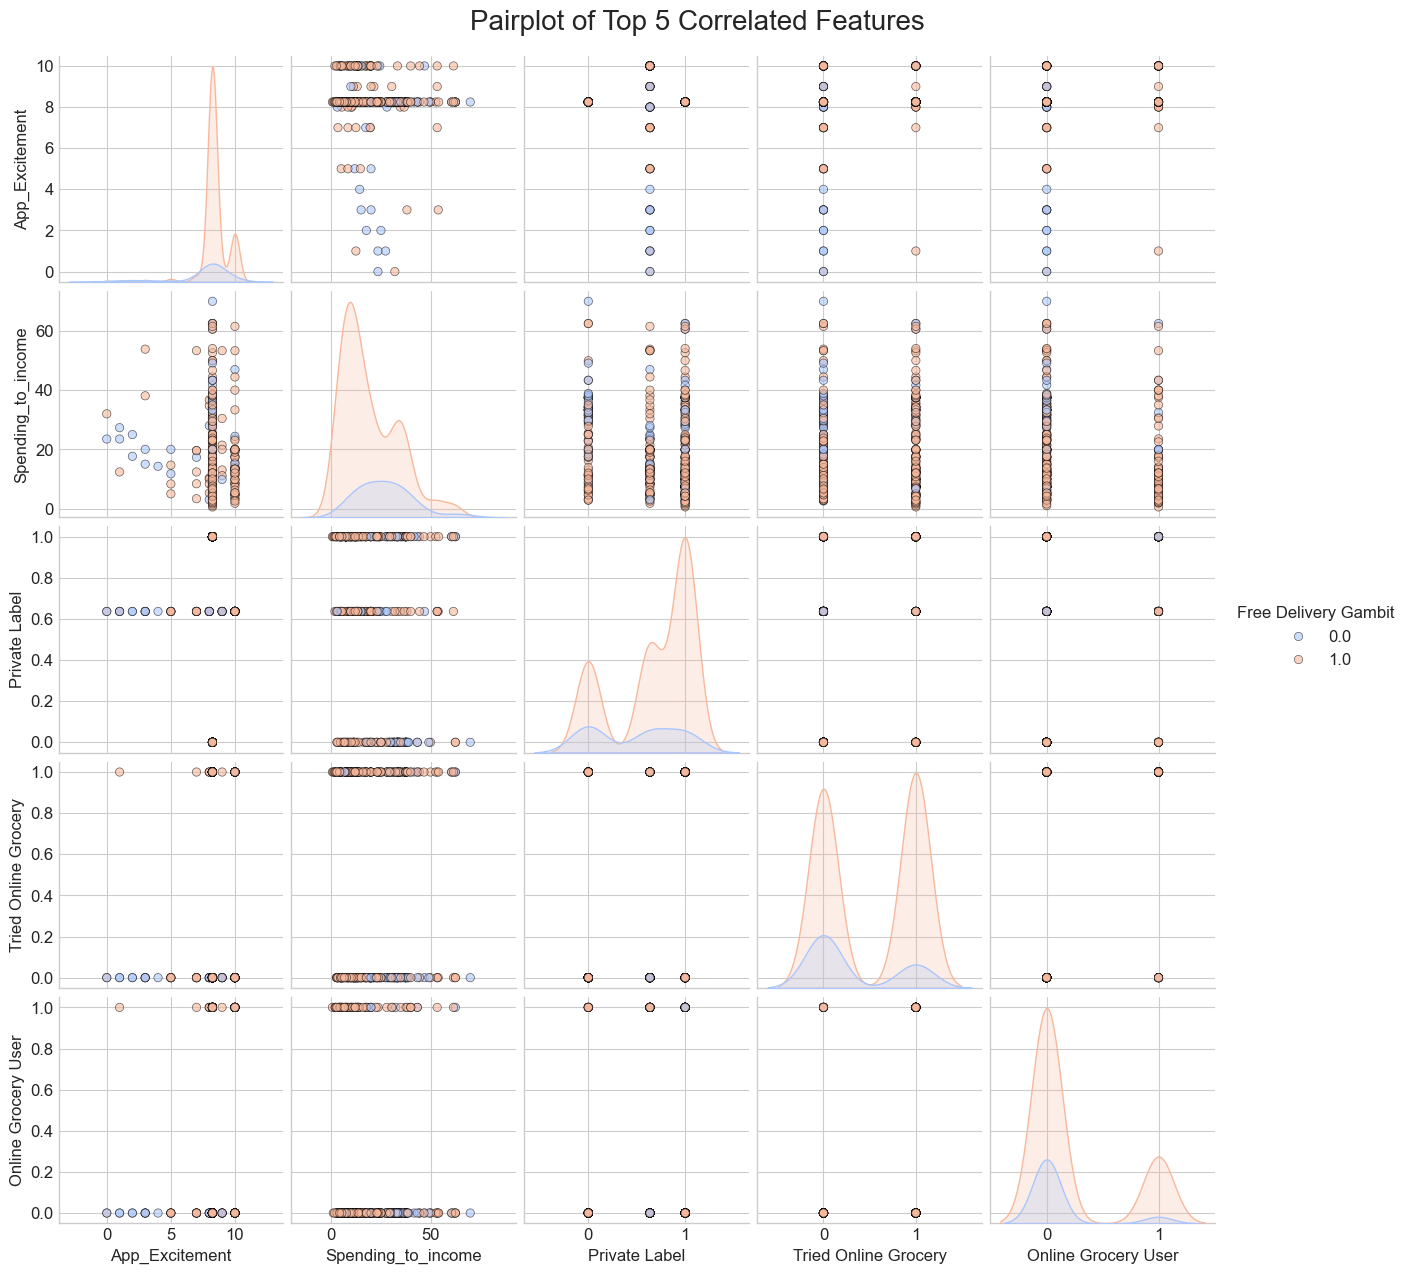


Analyzing categorical features...


/var/folders/8p/3y0vt8nx0j77_stq2p7d95t80000gn/T/ipykernel_69426/3695860029.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category',y='Target',data=plot_df,palette='viridis')


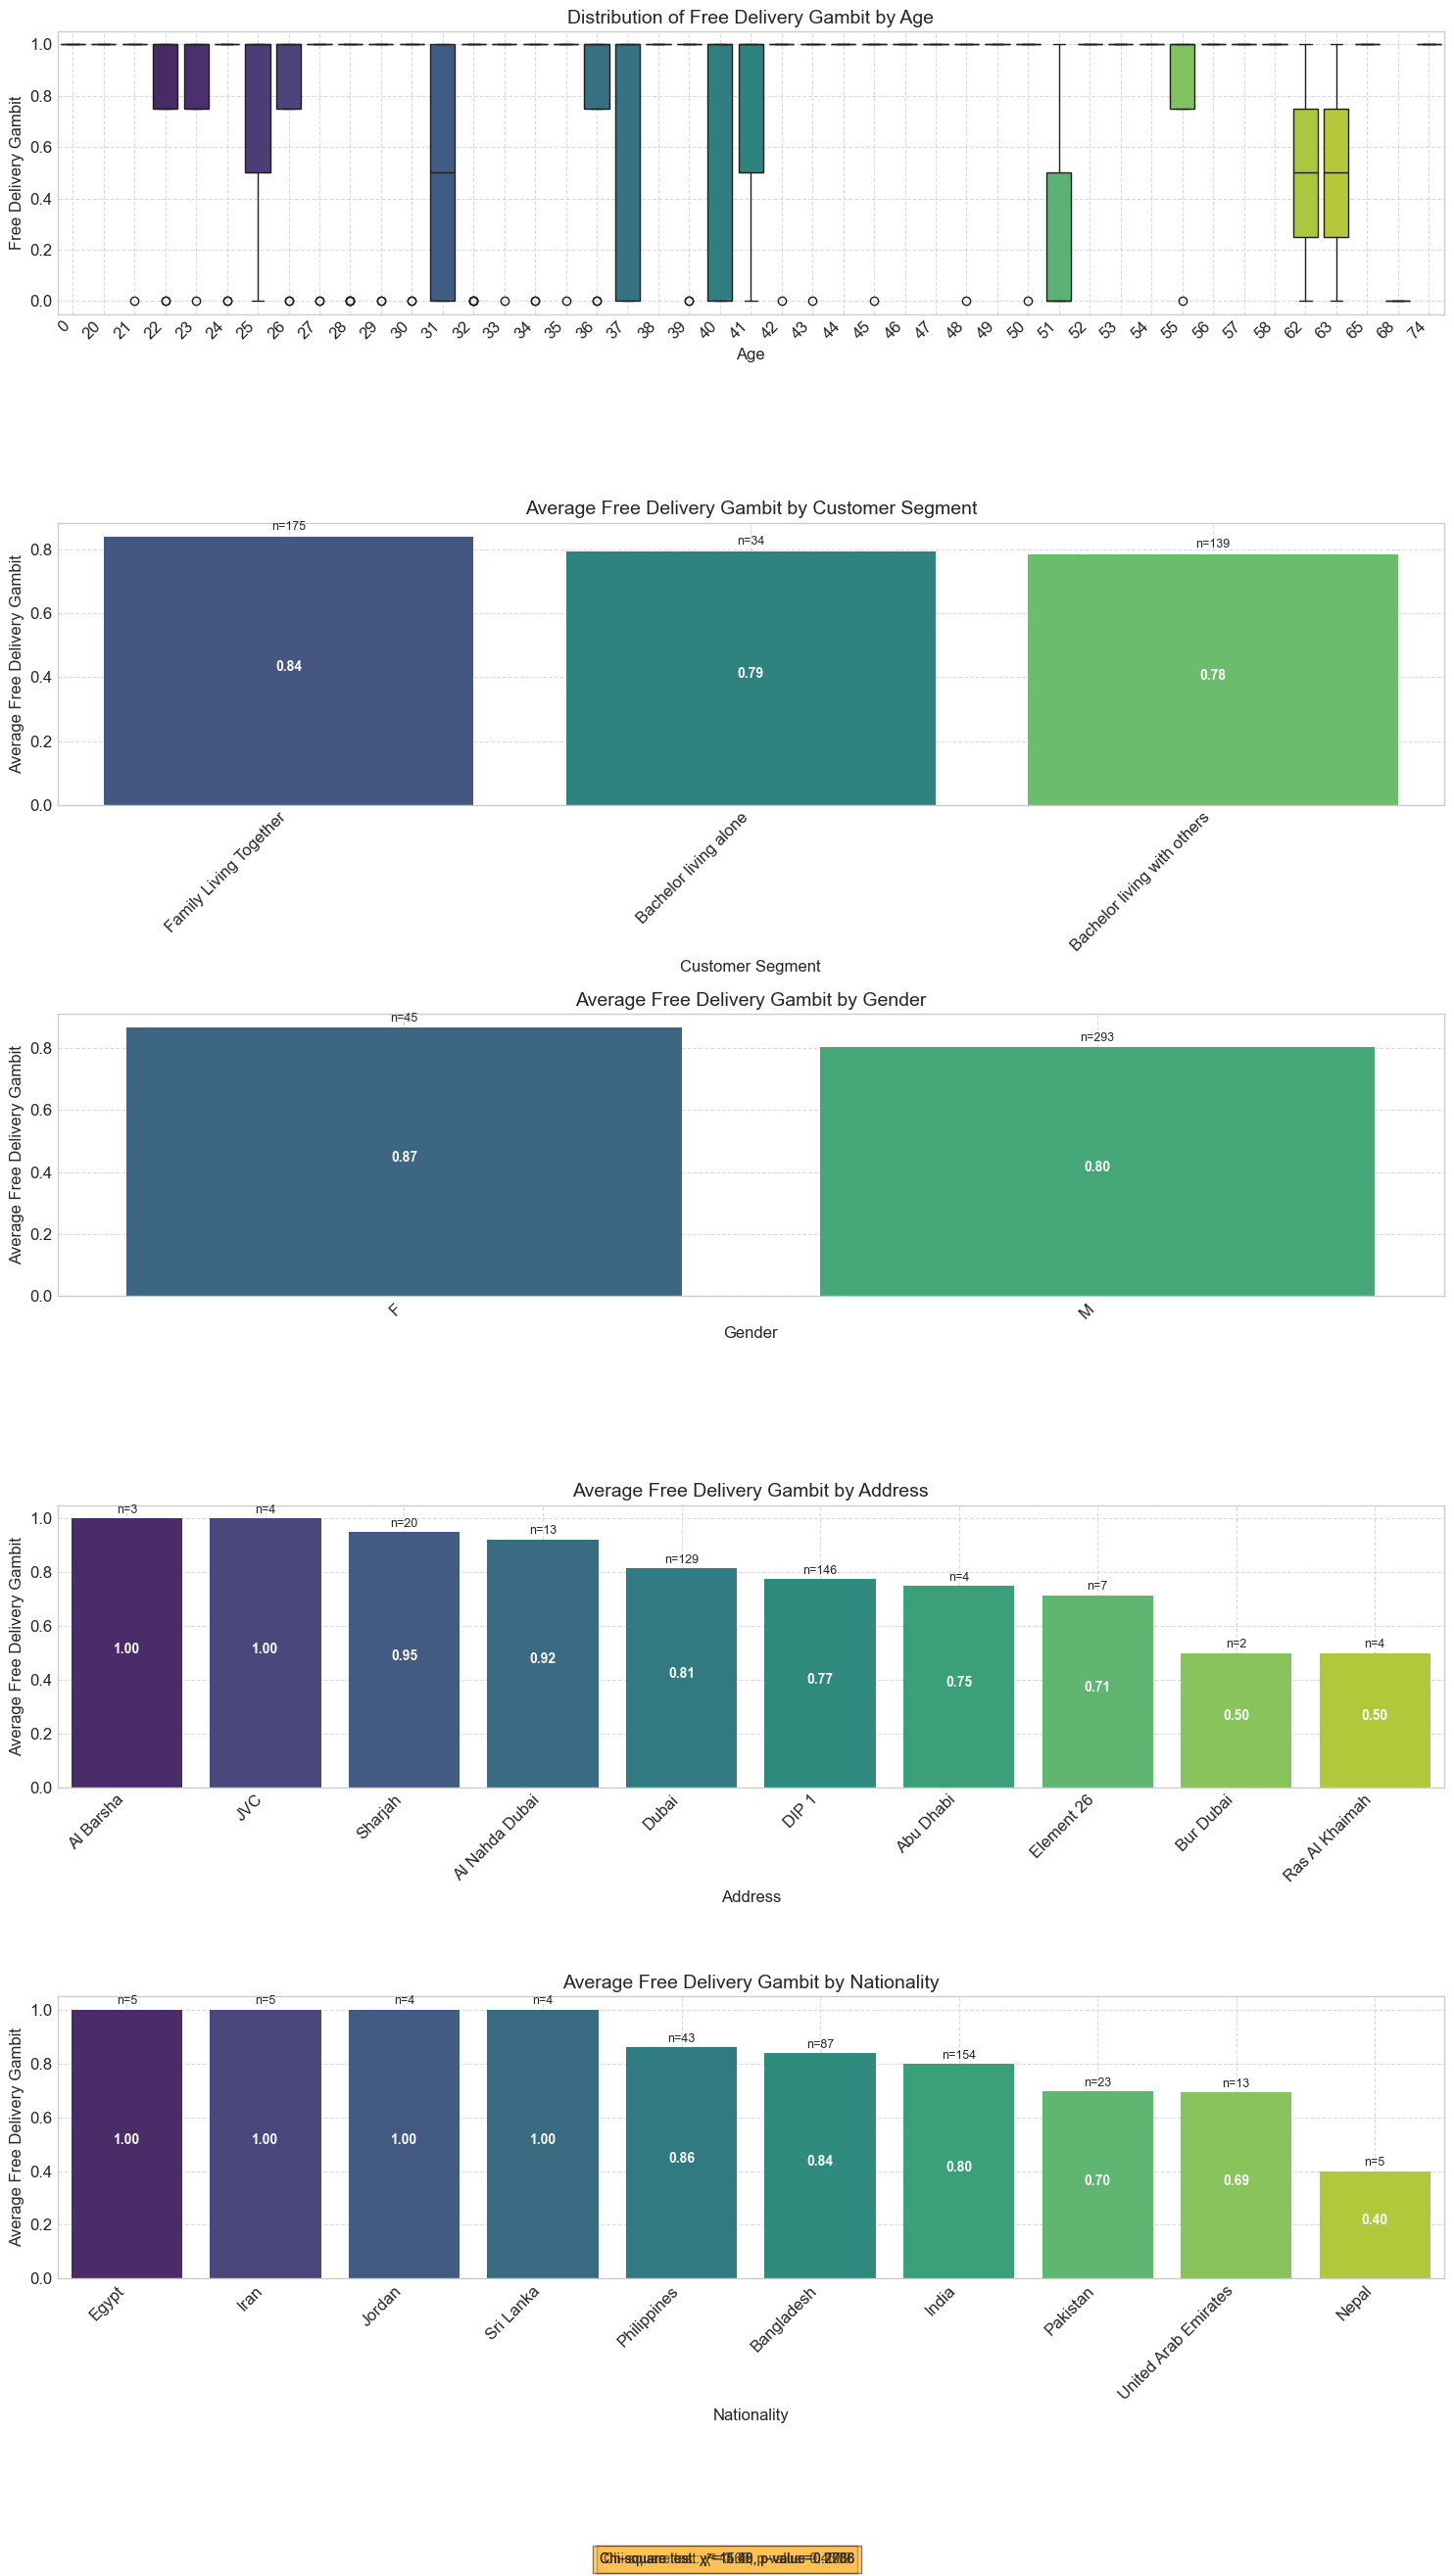

In [102]:
import scipy.stats as stats  # Import for chi-square test
# Define target column name
target_col = 'Free Delivery Gambit'
# Feature correlation analysis with Free Delivery Gambit
print("\n1.5 Feature Correlation Analysis with Target Variable")
# Check if model_data exists and contains the target column
if 'model_data' not in globals() or target_col not in model_data.columns:
    print("Error: model_data or target column not found")
else:
    # Create X and y from model_data
    y = model_data[target_col]
    X = model_data.drop(columns=[target_col])
    # Identify categorical features
    cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
    print(f"Categorical features: {cat_cols}")
    # Print available columns for debugging
    print("\nAvailable columns in model_data:")
    print(model_data.columns.tolist())
    # Add specific categorical columns we want to analyze
    important_cat_cols = []
    # Check if these columns exist in the dataframe
    if 'Age' in X.columns:
        important_cat_cols.append('Age')
    if 'Customer Segment' in X.columns:
        important_cat_cols.append('Customer Segment')
    if 'Gender' in X.columns:
        important_cat_cols.append('Gender')
    if 'Address' in X.columns:
        important_cat_cols.append('Address')
    if 'Nationality' in X.columns:
        important_cat_cols.append('Nationality')
    print(f"Important categorical features to analyze: {important_cat_cols}")
    # Select only numeric columns for correlation analysis
    numeric_df = X.select_dtypes(include=['int64','float64']).copy()
    numeric_df[target_col] = y  # Add target variable
    # Calculate correlation with target
    correlations = numeric_df.corr()[target_col].sort_values(ascending=False)
    # Display correlations
    print("\nFeature Correlations with Free Delivery Gambit:")
    print(correlations)
    # Plot top positive and negative correlations
    top_positive = correlations[correlations>0].drop(target_col).nlargest(5)
    top_negative = correlations[correlations<0].nsmallest(5)
    # Combine top correlations
    top_correlations = pd.concat([top_positive,top_negative])
    # Create a horizontal bar plot
    plt.figure(figsize=(12,8))
    colors = ['#4CAF50' if c>0 else '#F44336' for c in top_correlations]
    bars = plt.barh(top_correlations.index,top_correlations,color=colors)
    # Add correlation values as text
    for i,(feature,corr) in enumerate(top_correlations.items()):
        plt.text(corr+(0.01 if corr>0 else -0.01),i,f'{corr:.3f}',va='center',ha='left' if corr>0 else 'right',fontweight='bold')
    plt.axvline(x=0,color='black',linestyle='-',alpha=0.3)
    plt.title('Top Correlations with Free Delivery Gambit',fontsize=16,fontweight='bold')
    plt.xlabel('Correlation Coefficient',fontsize=14)
    plt.ylabel('Features',fontsize=14)
    plt.grid(axis='x',linestyle='--',alpha=0.7)
    plt.tight_layout()
    plt.savefig('Visualisations/regression/target_correlations.png',dpi=300)
    plt.show()
    # Create scatter plots for top correlated features
    plt.figure(figsize=(20,15))
    plt.suptitle('Relationship Between Top Features and Free Delivery Gambit',fontsize=20,y=0.95)
    # Select features to plot (top 5 positive and top 5 negative)
    features_to_plot = top_correlations.index.tolist()
    # Create subplots
    for i,feature in enumerate(features_to_plot):
        plt.subplot(2,5,i+1)
        # Add jitter to binary target for better visualization
        jittered_target = y+np.random.normal(0,0.05,size=len(y))
        # Create scatter plot
        plt.scatter(numeric_df[feature],jittered_target,alpha=0.5,c=y,cmap='coolwarm',edgecolors='k',linewidths=0.5)
        # Add regression line
        m,b = np.polyfit(numeric_df[feature],y,1)
        plt.plot(numeric_df[feature],m*numeric_df[feature]+b,color='black',linestyle='--')
        # Add correlation coefficient in title
        plt.title(f'{feature}\nCorrelation: {correlations[feature]:.3f}',fontsize=12)
        plt.xlabel(feature,fontsize=10)
        plt.ylabel('Free Delivery Gambit',fontsize=10)
        # Add grid
        plt.grid(True,linestyle='--',alpha=0.7)
    plt.tight_layout(rect=[0,0,1,0.95])  # Adjust for suptitle
    plt.savefig('Visualisations/regression/feature_scatter_plots.png',dpi=300)
    plt.show()
    # Create a heatmap of correlations between all numeric features
    plt.figure(figsize=(14,12))
    correlation_matrix = numeric_df.corr()
    mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))
    sns.heatmap(correlation_matrix,mask=mask,annot=False,cmap='coolwarm',vmin=-1,vmax=1,center=0,square=True,linewidths=.5)
    plt.title('Correlation Matrix of Numeric Features',fontsize=16,fontweight='bold')
    plt.tight_layout()
    plt.savefig('Visualisations/regression/correlation_heatmap.png',dpi=300)
    plt.show()
    # Create a more focused heatmap with just the top correlated features
    top_features = list(top_correlations.index)+[target_col]
    plt.figure(figsize=(12,10))
    top_corr_matrix = numeric_df[top_features].corr()
    sns.heatmap(top_corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0,square=True,linewidths=.5,fmt='.2f')
    plt.title('Correlation Matrix of Top Features with Target',fontsize=16,fontweight='bold')
    plt.tight_layout()
    plt.savefig('Visualisations/regression/top_features_heatmap.png',dpi=300)
    plt.show()
    # Create a pairplot for the top 5 most correlated features
    top_5_features = list(correlations.drop(target_col).abs().nlargest(5).index)+[target_col]
    pair_df = numeric_df[top_5_features].copy()
    pair_df[target_col] = pair_df[target_col].astype('category')  # Convert to category for better visualization
    plt.figure(figsize=(15,15))
    sns.pairplot(pair_df,hue=target_col,palette='coolwarm',diag_kind='kde',plot_kws={'alpha':0.6,'edgecolor':'k','linewidth':0.5})
    plt.suptitle('Pairplot of Top 5 Correlated Features',fontsize=20,y=1.02)
    plt.savefig('Visualisations/regression/top_features_pairplot.png',dpi=300,bbox_inches='tight')
    plt.show()
    # Analyze categorical features
    if important_cat_cols:
        print("\nAnalyzing categorical features...")
        plt.figure(figsize=(15,len(important_cat_cols)*5))
        for i,cat_col in enumerate(important_cat_cols):
            plt.subplot(len(important_cat_cols),1,i+1)
            if cat_col in X.columns:
                cat_data = X[cat_col]
                plot_df = pd.DataFrame({'Category':cat_data,'Target':y})
                if cat_col in ['Address','Nationality'] and len(plot_df['Category'].unique())>10:
                    top_values = plot_df['Category'].value_counts().nlargest(10).index.tolist()
                    plot_df = plot_df[plot_df['Category'].isin(top_values)]
                if len(plot_df['Category'].unique())<=10:
                    avg_by_cat = plot_df.groupby('Category',observed=True)['Target'].mean().sort_values(ascending=False)
                    count_by_cat = plot_df.groupby('Category',observed=True).size()
                    ax = sns.barplot(x=avg_by_cat.index,y=avg_by_cat.values,hue=avg_by_cat.index,palette='viridis',legend=False)
                    plt.title(f'Average {target_col} by {cat_col}',fontsize=14)
                    plt.xlabel(cat_col,fontsize=12)
                    plt.ylabel(f'Average {target_col}',fontsize=12)
                    plt.xticks(rotation=45,ha='right')
                    for j,(cat,avg) in enumerate(avg_by_cat.items()):
                        count = count_by_cat[cat]
                        plt.text(j,avg+0.02,f'n={count}',ha='center',fontsize=9)
                        plt.text(j,avg/2,f'{avg:.2f}',ha='center',fontsize=10,color='white',fontweight='bold')
                else:
                    sns.boxplot(x='Category',y='Target',data=plot_df,palette='viridis')
                    plt.title(f'Distribution of {target_col} by {cat_col}',fontsize=14)
                    plt.xlabel(cat_col,fontsize=12)
                    plt.ylabel(target_col,fontsize=12)
                    plt.xticks(rotation=45,ha='right')
                plt.grid(True,linestyle='--',alpha=0.7)
                try:
                    contingency = pd.crosstab(cat_data,y)
                    chi2,p,dof,expected = stats.chi2_contingency(contingency)
                    plt.figtext(0.5,-0.05,f"Chi-square test: χ²={chi2:.2f}, p-value={p:.4f}",ha="center",fontsize=10,bbox={"facecolor":"orange","alpha":0.2,"pad":5})
                    if p<0.05:
                        plt.figtext(0.5,-0.1,"Significant relationship detected (p<0.05)",ha="center",fontsize=10,color='red')
                except Exception as e:
                    print(f"Error performing chi-square test for {cat_col}: {e}")
            else:
                print(f"Column {cat_col} not found, skipping...")
        plt.tight_layout()
        plt.savefig('Visualisations/regression/categorical_analysis.png',dpi=300)
        plt.show()
    else:
        print("No categorical features to analyze")

## Hypothesis Visualisations

In [103]:
import statsmodels.api as sm
import numpy as np

# Filter model_data to get non-online grocery users
df_non_online = model_data[model_data['Online Grocery User'] == 0].copy()

# Get the target variable
y = df_non_online['Free Delivery Gambit']

# Create an intercept-only predictor (a column of ones)
X = sm.add_constant(np.ones(len(y)))

# Fit the intercept-only linear probability model
model = sm.OLS(y, X).fit()

# Extract statistics for the constant
coef = model.params['const']
std_err = model.bse['const']
t_value = model.tvalues['const']
p_value = model.pvalues['const']
conf_int_lower, conf_int_upper = model.conf_int().loc['const']

# Build and print an ASCII table with the results
print("+-----------------------------------------------+")
print("| Statistic                |        Value       |")
print("+-----------------------------------------------+")
print(f"| Coefficient (Intercept)  |     {coef:>7.4f}        |")
print(f"| Standard Error           |     {std_err:>7.4f}        |")
print(f"| t-value                  |    {t_value:>8.3f}        |")
print(f"| p-value                  |    {p_value:>8.3f}        |")
print(f"| 95% Conf. Interval       |   [{conf_int_lower:>5.3f}, {conf_int_upper:>5.3f}]   |")
print("+-----------------------------------------------+")

+-----------------------------------------------+
| Statistic                |        Value       |
+-----------------------------------------------+
| Coefficient (Intercept)  |      0.7855        |
| Standard Error           |      0.0248        |
| t-value                  |      31.672        |
| p-value                  |       0.000        |
| 95% Conf. Interval       |   [0.737, 0.834]   |
+-----------------------------------------------+


In [104]:
import statsmodels.api as sm
import numpy as np

# Bachelors: either "customer_segment_Bachelor living with others" or "customer_segment_Bachelor living alone" equals 1.
# Families: "customer_segment_Family Living Together" equals 1.
df_bachelors = model_data[(model_data['customer_segment_Bachelor living with others'] == 1) | 
                          (model_data['customer_segment_Bachelor living alone'] == 1)].copy()
df_families  = model_data[model_data['customer_segment_Family Living Together'] == 1].copy()

# Create a difference variable: difference = (Convenience Rank) - (Cheapest prices Rank)
# A positive difference implies that the respondent ranks price (Cheapest prices) higher (i.e., lower numeric rank)
# than convenience. Conversely, a negative value indicates that convenience is prioritized.
df_bachelors['price_convenience_diff'] = df_bachelors['Convenience Rank'] - df_bachelors['Cheapest prices Rank']
df_families['price_convenience_diff']  = df_families['Convenience Rank']  - df_families['Cheapest prices Rank']

# For Bachelors:
y_bachelors = df_bachelors['price_convenience_diff']
X_bachelors = sm.add_constant(np.ones(len(y_bachelors)))  # Intercept-only model
model_bachelors = sm.OLS(y_bachelors, X_bachelors).fit()

# For Families:
y_families = df_families['price_convenience_diff']
X_families = sm.add_constant(np.ones(len(y_families)))  # Intercept-only model
model_families = sm.OLS(y_families, X_families).fit()

# Function to print an ASCII table of key regression statistics
def print_ascii_table(model, group_name):
    coef = model.params['const']
    std_err = model.bse['const']
    t_value = model.tvalues['const']
    p_value = model.pvalues['const']
    conf_int_lower, conf_int_upper = model.conf_int().loc['const']
    
    print(f"\nSegment: {group_name}")
    print("+-----------------------------------------------+")
    print("| Statistic                |        Value       |")
    print("+-----------------------------------------------+")
    print(f"| Coefficient (Intercept)  |     {coef:>7.4f}        |")
    print(f"| Standard Error           |     {std_err:>7.4f}        |")
    print(f"| t-value                  |    {t_value:>8.3f}        |")
    print(f"| p-value                  |    {p_value:>8.3f}        |")
    print(f"| 95% Conf. Interval       |   [{conf_int_lower:>5.3f}, {conf_int_upper:>5.3f}]   |")
    print("+-----------------------------------------------+")

# Print the regression summaries for each segment
print_ascii_table(model_bachelors, "Bachelors")
print_ascii_table(model_families, "Families")


Segment: Bachelors
+-----------------------------------------------+
| Statistic                |        Value       |
+-----------------------------------------------+
| Coefficient (Intercept)  |      0.7168        |
| Standard Error           |      0.0740        |
| t-value                  |       9.681        |
| p-value                  |       0.000        |
| 95% Conf. Interval       |   [0.571, 0.863]   |
+-----------------------------------------------+

Segment: Families
+-----------------------------------------------+
| Statistic                |        Value       |
+-----------------------------------------------+
| Coefficient (Intercept)  |      0.6057        |
| Standard Error           |      0.1072        |
| t-value                  |       5.651        |
| p-value                  |       0.000        |
| 95% Conf. Interval       |   [0.394, 0.817]   |
+-----------------------------------------------+


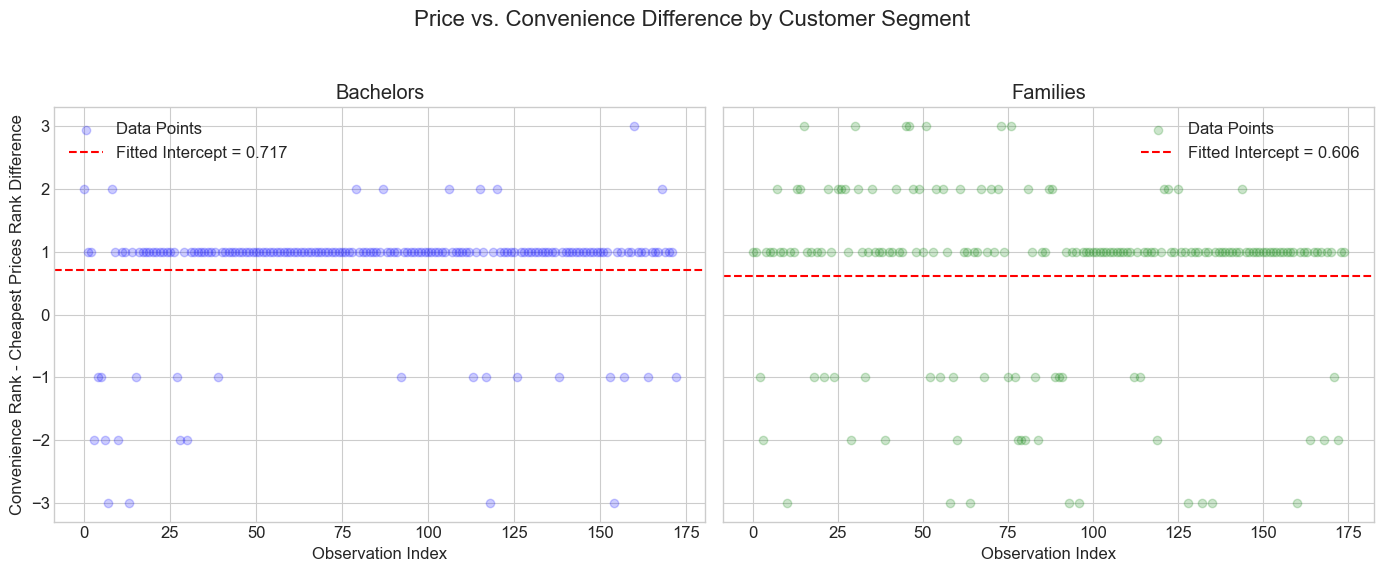

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Bachelors
axes[0].scatter(range(len(df_bachelors)), df_bachelors['price_convenience_diff'], color='blue', alpha=0.2, label='Data Points')
axes[0].axhline(y=model_bachelors.params['const'], color='red', linestyle='--',
                label=f'Fitted Intercept = {model_bachelors.params["const"]:.3f}')
axes[0].set_title('Bachelors')
axes[0].set_xlabel('Observation Index')
axes[0].set_ylabel('Convenience Rank - Cheapest Prices Rank Difference')
axes[0].legend()

# Plot for Families
axes[1].scatter(range(len(df_families)), df_families['price_convenience_diff'], color='green', alpha=0.2, label='Data Points')
axes[1].axhline(y=model_families.params['const'], color='red', linestyle='--',
                label=f'Fitted Intercept = {model_families.params["const"]:.3f}')
axes[1].set_title('Families')
axes[1].set_xlabel('Observation Index')
axes[1].legend()

plt.suptitle('Price vs. Convenience Difference by Customer Segment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


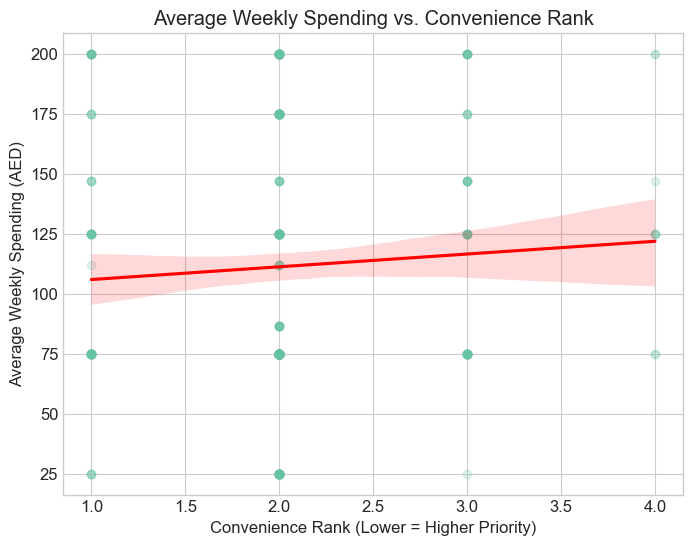

Regression Statistics:
Slope (Convenience Rank): 5.3179
Intercept: 100.4930
Standard Error of Slope: 4.5415
t-value for Slope: 1.1710
p-value for Slope: 0.2424
95% Confidence Interval for Slope: [-3.61452826931173, 14.250237000111277]
R-squared: 0.0039


In [106]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = model_data['Convenience Rank']
y = model_data['Average Weekly Spending']
X_const = sm.add_constant(X)

# Fit the linear regression model
reg_model = sm.OLS(y, X_const).fit()

# Plot a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Convenience Rank', y='Average Weekly Spending', 
            data=model_data, 
            scatter_kws={'alpha': 0.2},  # set transparency for better density visualization
            line_kws={'color': 'red'})    # regression line in red
plt.xlabel('Convenience Rank (Lower = Higher Priority)')
plt.ylabel('Average Weekly Spending (AED)')
plt.title('Average Weekly Spending vs. Convenience Rank')
plt.show()

# Print regression statistics
print("Regression Statistics:")
print(f"Slope (Convenience Rank): {reg_model.params['Convenience Rank']:.4f}")
print(f"Intercept: {reg_model.params['const']:.4f}")
print(f"Standard Error of Slope: {reg_model.bse['Convenience Rank']:.4f}")
print(f"t-value for Slope: {reg_model.tvalues['Convenience Rank']:.4f}")
print(f"p-value for Slope: {reg_model.pvalues['Convenience Rank']:.4f}")
print(f"95% Confidence Interval for Slope: {reg_model.conf_int().loc['Convenience Rank'].tolist()}")
print(f"R-squared: {reg_model.rsquared:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create a new column representing the difference from the 30-minute benchmark.
model_data['delivery_diff'] = model_data['Considered Fast Delivery'] - 30

# Set up the regression: an intercept-only model.
y = model_data['delivery_diff']
X = sm.add_constant(np.ones(len(y)))  # This creates a column of ones.

# Fit the intercept-only linear probability model.
model = sm.OLS(y, X).fit()

# Print regression statistics.
print("Regression Statistics:")
print(f"Intercept (Difference): {model.params['const']:.4f}")
print(f"Standard Error: {model.bse['const']:.4f}")
print(f"t-value: {model.tvalues['const']:.4f}")
print(f"p-value: {model.pvalues['const']:.4f}")
conf_int = model.conf_int().loc['const']
print(f"95% Confidence Interval: [{conf_int[0]:.3f}, {conf_int[1]:.3f}]")
print(f"R-squared: {model.rsquared:.4f}")

# Visualize the data points and fitted line.
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, alpha=1.0, label="Data Points")
plt.axhline(y=model.params['const'], color='red', linestyle='--',
            label=f"Fitted Intercept = {model.params['const']:.4f}")
plt.xlabel("Observation Index")
plt.ylabel("Difference from 30 minutes")
plt.title("Intercept-Only Regression: Deviation from 30-Minute Fast Delivery")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import os

# Load model_data if not already loaded
if 'model_data' not in globals():
    model_data = pd.read_csv('Quant_Research/data/csv/model_data.csv')

# Define the current market standard delivery time (in minutes)
# This is based on our competitor analysis where 
# we found that the the fastest average delivery time is 35 minutes (Talabat)
current_market_standard = 35  # minutes

# Extract the expected and considered fast delivery times
expected_delivery = model_data['Expected Standard Delivery']
fast_delivery = model_data['Considered Fast Delivery']

# Calculate the difference between what users expect and the market standard
delivery_gap = current_market_standard - expected_delivery


# H0: Users expect delivery times equal to or slower than market standard (gap ≤ 0)
# H1: Users expect faster delivery times than market standard (gap > 0)

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(delivery_gap, 0, alternative='greater')

# Calculate confidence interval
ci_lower, ci_upper = stats.t.interval(0.95, len(delivery_gap)-1, 
                                     loc=np.mean(delivery_gap), 
                                     scale=stats.sem(delivery_gap))

# Create a figure with multiple subplots
plt.figure(figsize=(18, 12))

# 1. Distribution of Expected Standard Delivery Times
plt.subplot(2, 2, 1)
sns.histplot(expected_delivery, kde=True, color='blue')
plt.axvline(x=current_market_standard, color='red', linestyle='--', 
           label=f'Current Market Standard: {current_market_standard} min')
plt.axvline(x=expected_delivery.mean(), color='green', linestyle='-', 
           label=f'Mean Expected: {expected_delivery.mean():.1f} min')
plt.title('Distribution of Expected Standard Delivery Times', fontsize=14)
plt.xlabel('Expected Delivery Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# 2. Distribution of Considered Fast Delivery Times
plt.subplot(2, 2, 2)
sns.histplot(fast_delivery, kde=True, color='purple')
plt.axvline(x=fast_delivery.mean(), color='green', linestyle='-', 
           label=f'Mean Fast: {fast_delivery.mean():.1f} min')
plt.title('Distribution of "Considered Fast" Delivery Times', fontsize=14)
plt.xlabel('Fast Delivery Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# 3. Delivery Gap Analysis
plt.subplot(2, 2, 3)
sns.histplot(delivery_gap, kde=True, color='teal')
plt.axvline(x=0, color='red', linestyle='--', 
           label='No Gap (H0)')
plt.axvline(x=delivery_gap.mean(), color='green', linestyle='-', 
           label=f'Mean Gap: {delivery_gap.mean():.1f} min')
plt.axvline(x=ci_lower, color='orange', linestyle=':', 
           label=f'95% CI: [{ci_lower:.1f}, {ci_upper:.1f}]')
plt.axvline(x=ci_upper, color='orange', linestyle=':')
plt.title('Delivery Time Gap (Market Standard - Expected)', fontsize=14)
plt.xlabel('Delivery Gap (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# 4. Boxplot comparison
plt.subplot(2, 2, 4)
comparison_data = pd.DataFrame({
    'Expected Standard': expected_delivery,
    'Considered Fast': fast_delivery,
    'Market Standard': pd.Series([current_market_standard] * len(expected_delivery))
})
sns.boxplot(data=comparison_data)
plt.title('Comparison of Delivery Time Expectations', fontsize=14)
plt.ylabel('Time (minutes)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add hypothesis test results as text
plt.figtext(0.5, 0.01, 
           f"Hypothesis Test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.6f}\n" +
           f"Mean Delivery Gap = {delivery_gap.mean():.2f} minutes, 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]\n" +
           (f"CONCLUSION: REJECT H0 - Users expect significantly faster delivery than market standard (p < 0.05)" 
            if p_value < 0.05 else 
            f"CONCLUSION: FAIL TO REJECT H0 - No evidence that users expect faster delivery than market standard (p ≥ 0.05)"),
           ha='center', fontsize=14, bbox=dict(facecolor='yellow', alpha=0.2))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('H5: Users expect faster delivery times than the market is currently able to offer', 
            fontsize=16, fontweight='bold', y=0.98)

# Create directories if they don't exist
save_dir = 'Quant_Research/visualizations/hypothesis_testing'
os.makedirs(save_dir, exist_ok=True)

# Save the figure
plt.savefig(f'{save_dir}/H5_delivery_expectations.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis: Regression approach
# Create a dataframe for the regression
reg_data = pd.DataFrame({
    'delivery_gap': delivery_gap
})

# Add a constant (intercept) to the model
X = sm.add_constant(np.ones(len(reg_data)))

# Fit the intercept-only model
model = sm.OLS(reg_data['delivery_gap'], X).fit()

# Print regression statistics
print("\nRegression Analysis of Delivery Gap:")
print(f"Intercept (Mean Gap): {model.params['const']:.4f}")
print(f"Standard Error: {model.bse['const']:.4f}")
print(f"t-value: {model.tvalues['const']:.4f}")
print(f"p-value: {model.pvalues['const']:.4f}")
conf_int = model.conf_int().loc['const']
print(f"95% Confidence Interval: [{conf_int[0]:.3f}, {conf_int[1]:.3f}]")

# Create a table with summary statistics
summary_stats = pd.DataFrame({
    'Metric': ['Expected Standard Delivery (min)', 'Considered Fast Delivery (min)', 
              'Market Standard (min)', 'Delivery Gap (min)'],
    'Mean': [expected_delivery.mean(), fast_delivery.mean(), 
            current_market_standard, delivery_gap.mean()],
    'Median': [expected_delivery.median(), fast_delivery.median(), 
              current_market_standard, delivery_gap.median()],
    'Std Dev': [expected_delivery.std(), fast_delivery.std(), 
               0, delivery_gap.std()],
    'Min': [expected_delivery.min(), fast_delivery.min(), 
           current_market_standard, delivery_gap.min()],
    'Max': [expected_delivery.max(), fast_delivery.max(), 
           current_market_standard, delivery_gap.max()]
})

# Print the summary statistics table
print("\nSummary Statistics:")
print(summary_stats.to_string(index=False, float_format=lambda x: f"{x:.2f}"))

# Final conclusion
alpha = 0.05
print("\nHypothesis Test Conclusion:")
if p_value < alpha:
    print(f"REJECT H0 (p-value = {p_value:.6f} < {alpha})")
    print("There is statistically significant evidence that users expect faster delivery times")
    print(f"than the current market standard of {current_market_standard} minutes.")
else:
    print(f"FAIL TO REJECT H0 (p-value = {p_value:.6f} ≥ {alpha})")
    print("There is insufficient evidence that users expect faster delivery times")
    print(f"than the current market standard of {current_market_standard} minutes.")

In [109]:
import os
# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save the engineered dataset
model_data.to_csv('Quant_Research/data/engineered_data.csv', index=False)
print("Data saved successfully to data/engineered_data.csv")

Data saved successfully to data/engineered_data.csv
